In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
pd.pandas.set_option('display.max_columns', None)

In [4]:
data = pd.read_excel('Train_set.xlsx')

In [5]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
data.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
data.shape

(10683, 11)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
data['Airline'].value_counts()

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64

In [11]:
data['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

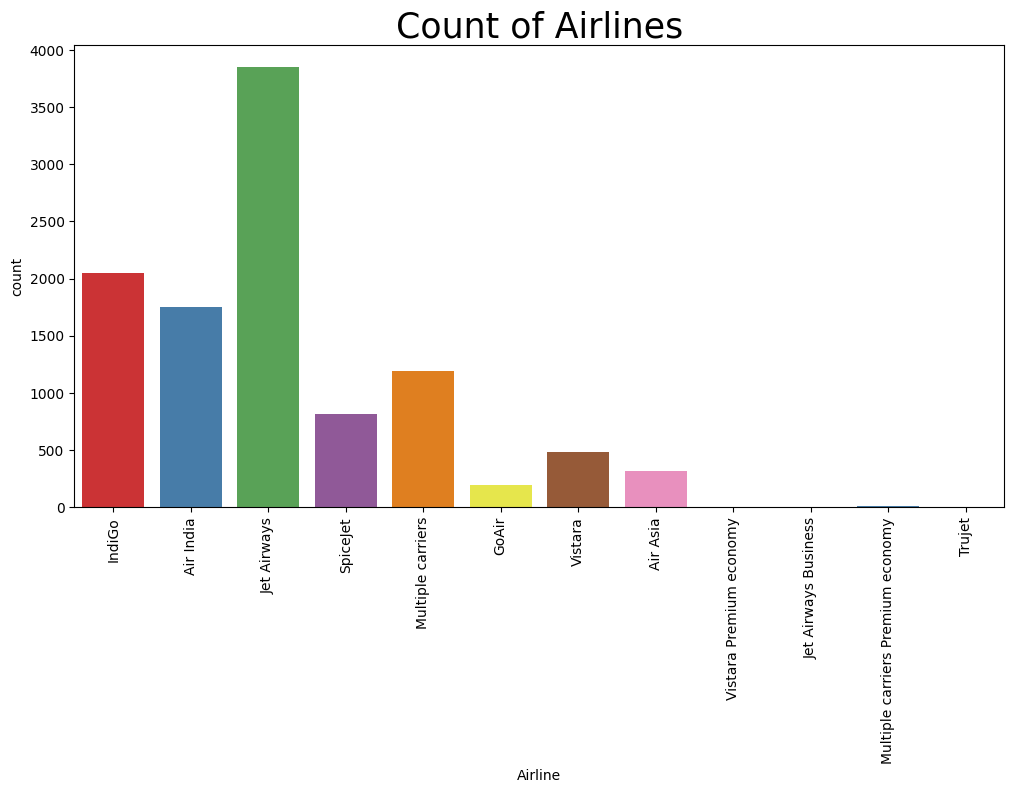

In [12]:
plt.figure(figsize = (12,6))
sns.countplot(x= 'Airline', data = data, palette = 'Set1')
plt.title('Count of Airlines', size = 25)
plt.xticks(rotation = 90)
plt.show()

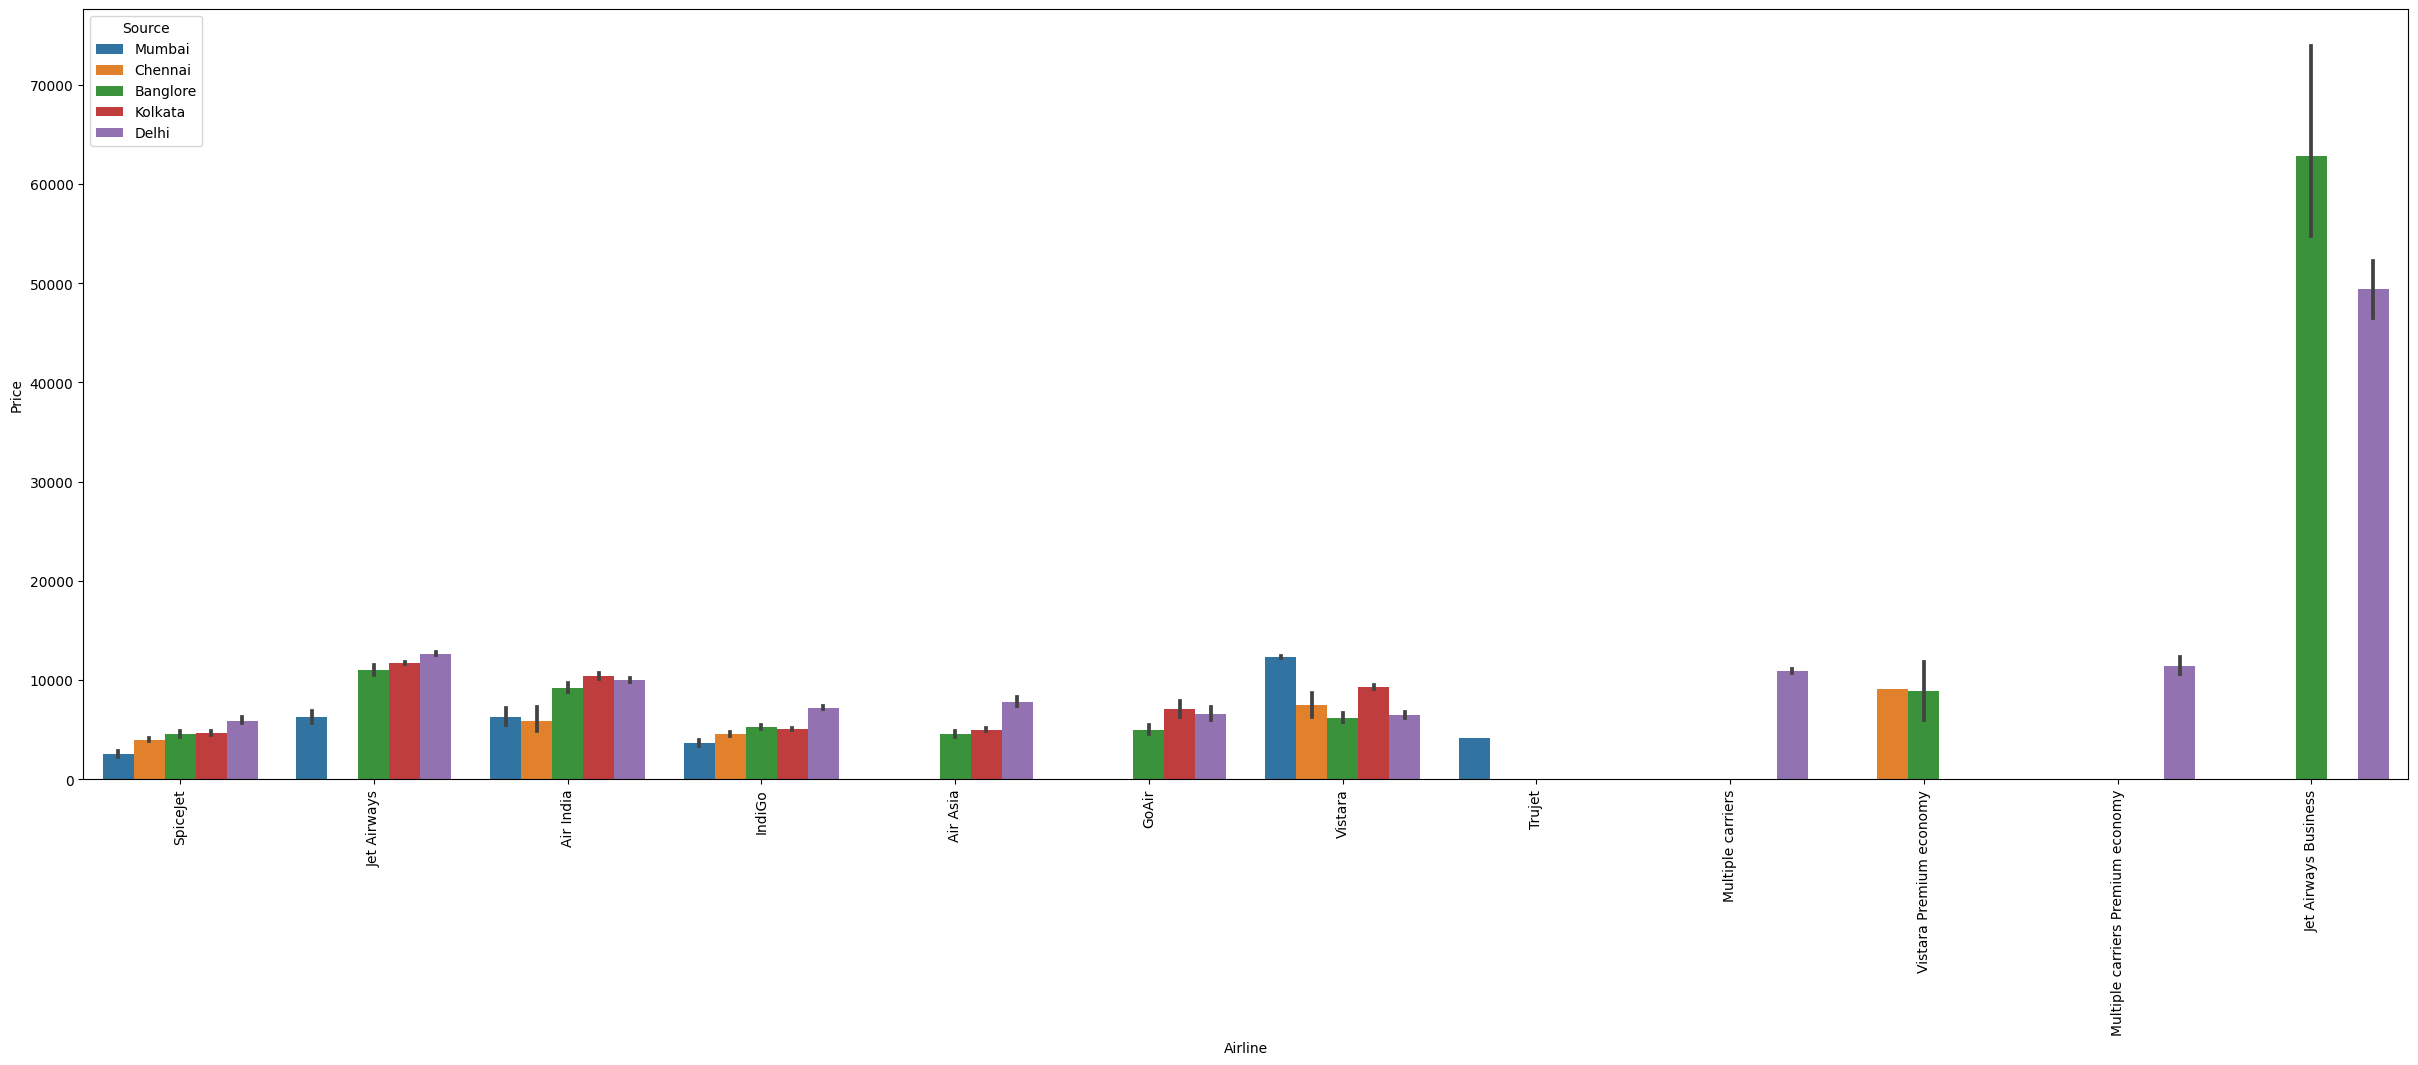

In [13]:
plt.figure(figsize = (30,10))
sns.barplot(x = 'Airline', y = 'Price',hue = 'Source', data = data.sort_values('Price'))
plt.xticks(rotation = 90)
plt.show()

In [14]:
data['Date_of_Journey']


0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [15]:
data['Date_of_Journey'].dtype

dtype('O')

In [16]:
data['Date'] = pd.to_datetime(data.Date_of_Journey,format = '%d/%m/%Y', errors = 'ignore').dt.day


In [17]:
data['Month'] = pd.to_datetime(data.Date_of_Journey,format = '%d/%m/%Y', errors = 'ignore').dt.month


In [18]:
data['Year'] = pd.to_datetime(data.Date_of_Journey,format = '%d/%m/%Y', errors = 'ignore').dt.year


In [19]:
data['Date_of_Journey']

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10683, dtype: object

In [20]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [21]:
data['Source'].isnull().sum()

0

In [22]:
data['Source'].value_counts()

Source
Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: count, dtype: int64

In [23]:
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

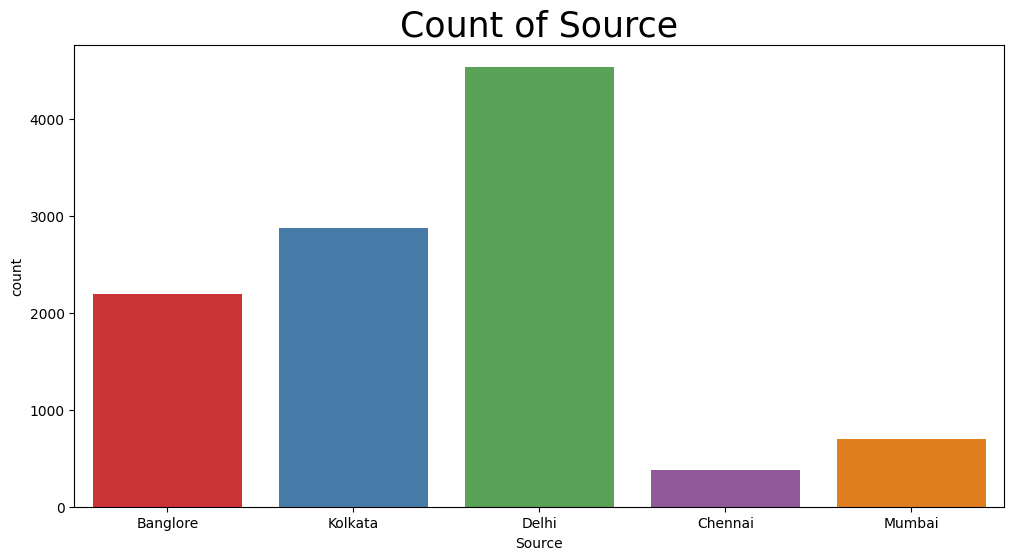

In [24]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Source', data = data, palette = 'Set1')
plt.title('Count of Source', size = 25)
plt.show()

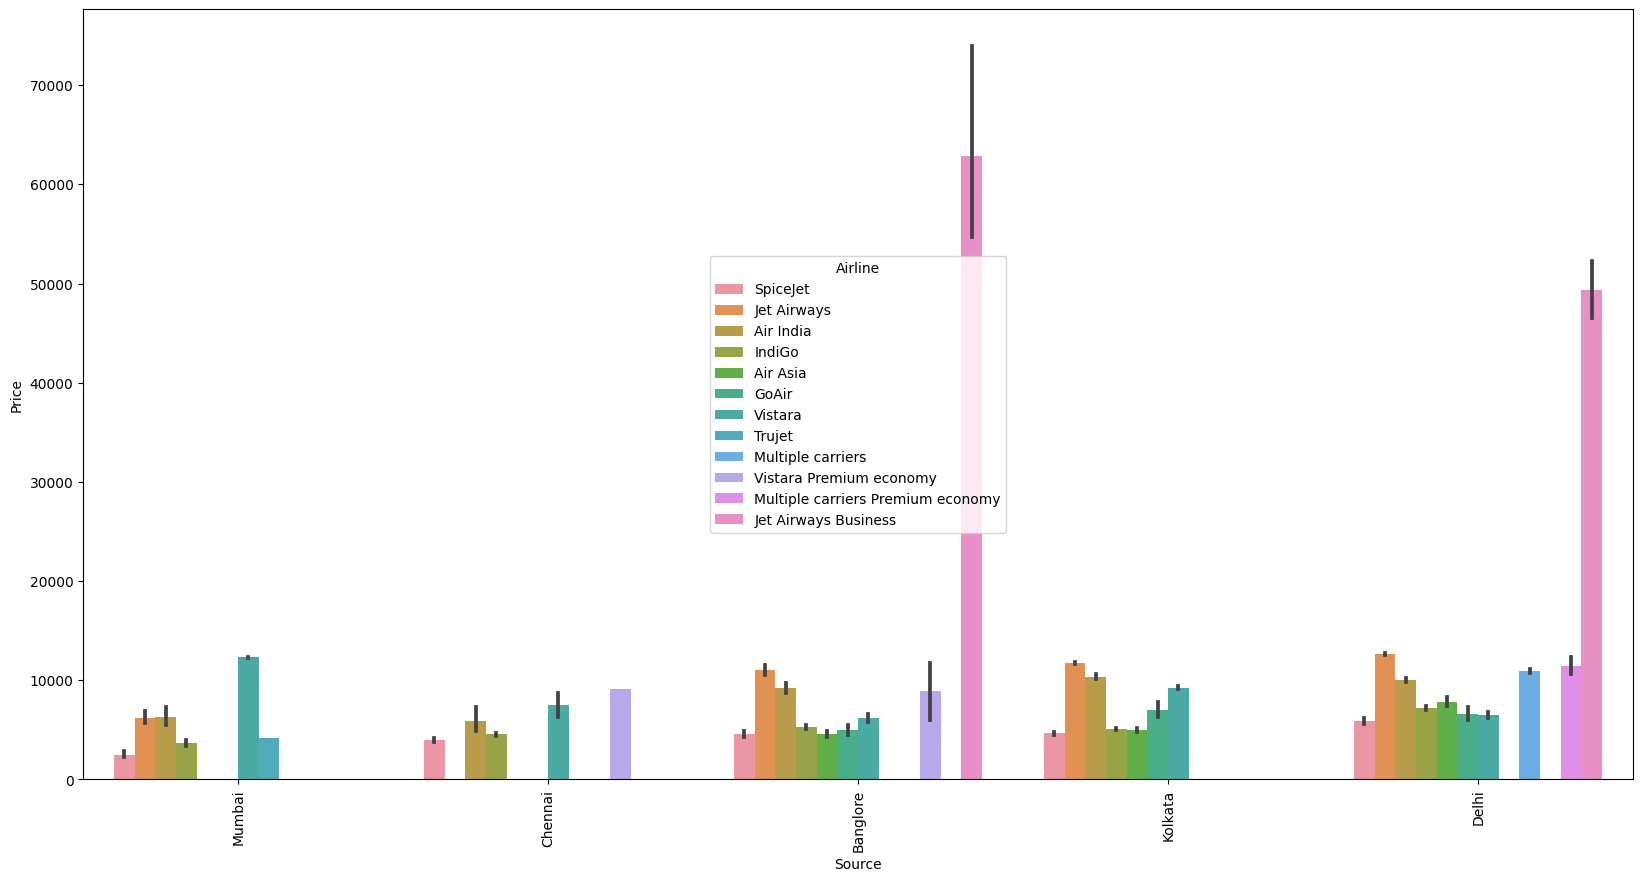

In [25]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'Source', y = 'Price', hue = 'Airline', data = data.sort_values('Price'))
plt.xticks(rotation = 90)
plt.show()

In [26]:
data['Destination'].isnull().sum()

0

In [27]:
data['Destination'].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

In [28]:
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [29]:
data['Destination'] = data['Destination'].replace('New Delhi', 'Delhi')

In [30]:
data['Destination'].value_counts()

Destination
Cochin       4537
Banglore     2871
Delhi        2197
Hyderabad     697
Kolkata       381
Name: count, dtype: int64

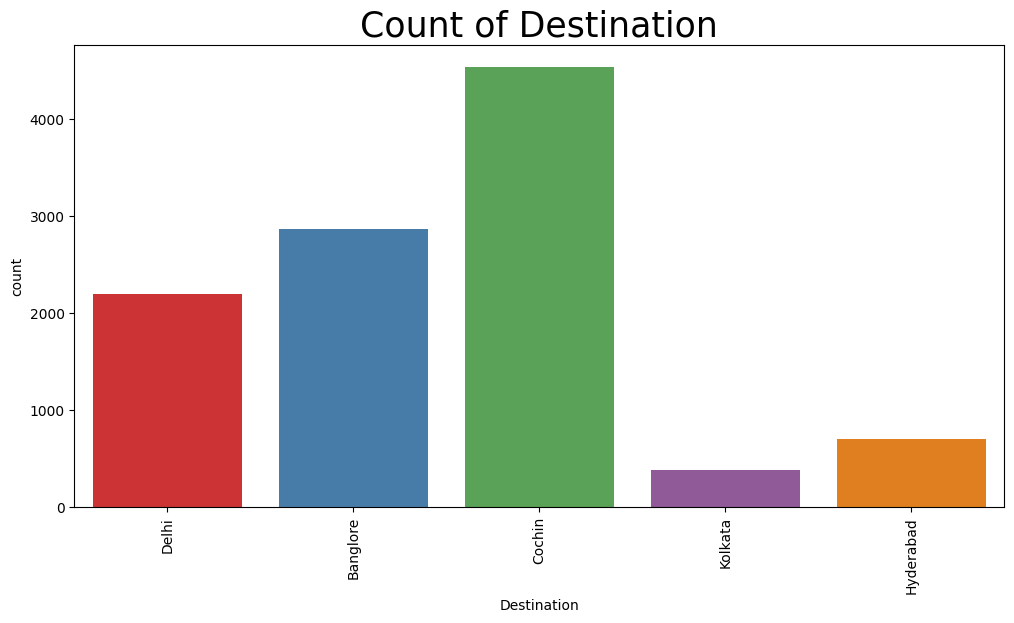

In [31]:
plt.figure(figsize = (12,6))
sns.countplot(x = 'Destination', data = data, palette = 'Set1')
plt.title('Count of Destination', size = 25)
plt.xticks(rotation = 90)
plt.show()

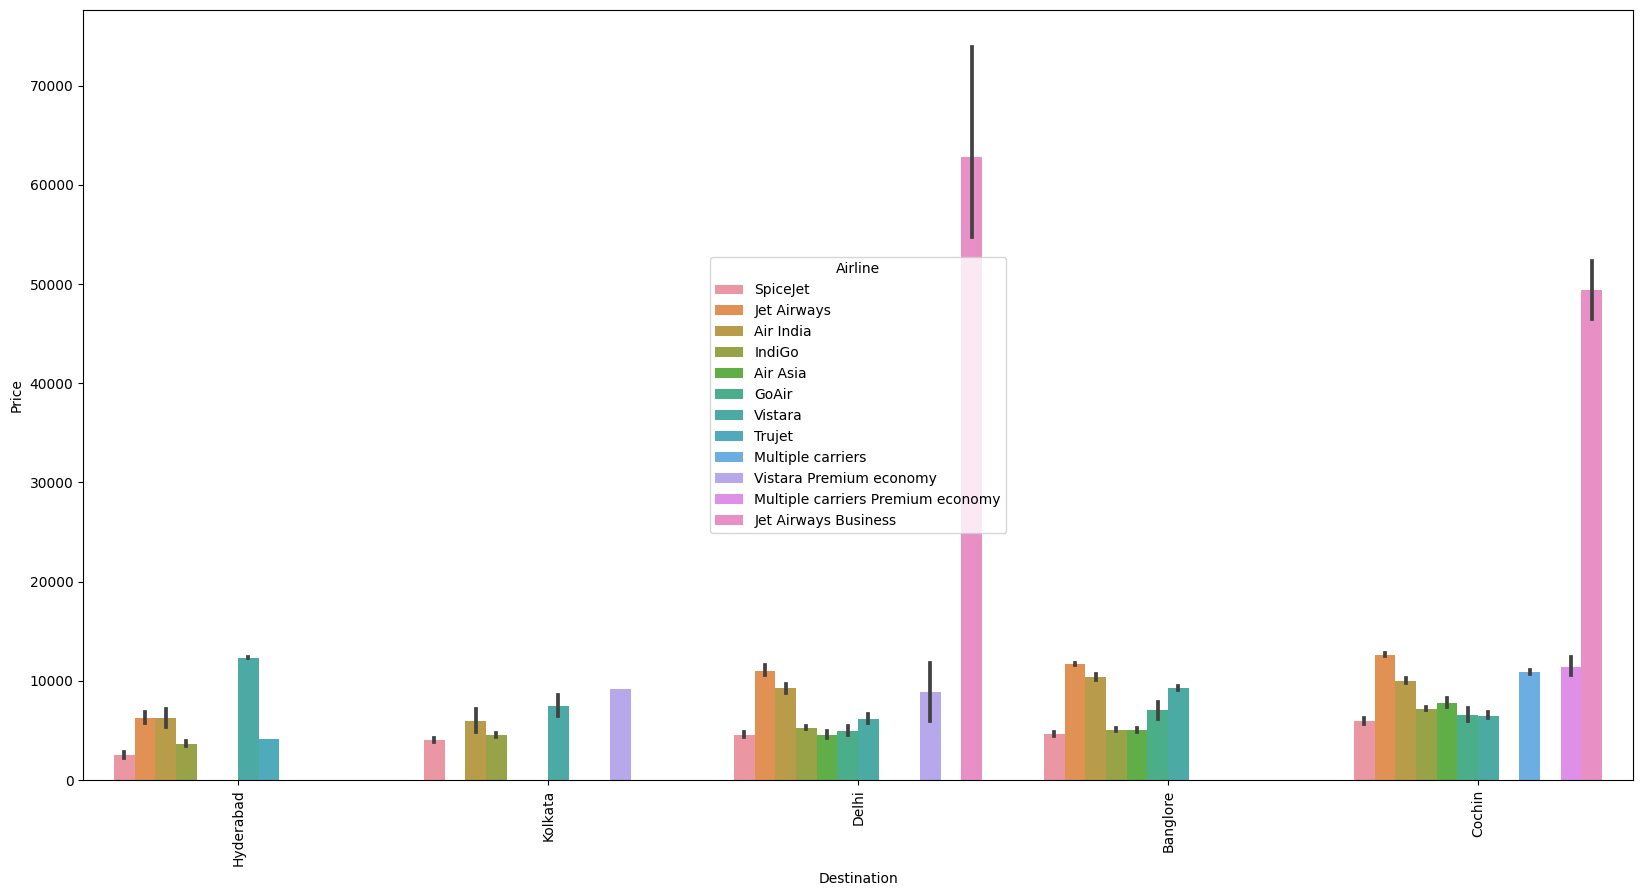

In [32]:
plt.figure(figsize = (20,10))
sns.barplot(x = 'Destination', y = 'Price', hue = 'Airline', data = data.sort_values('Price'))
plt.xticks(rotation = 90)
plt.show()

There is no null value in Destination 
NewDelhi is Changed to Delhi
Cochin has highest value of Airline Destinations
The Airline price based on Destination , Delhi is highest followed by Cochin 
Jet Airways Business is most  Expensive with respective to others


In [33]:
data['Route'].isnull().sum()

1

In [34]:
data['Route'].dtypes

dtype('O')

In [35]:
data['Route'].value_counts()

Route
DEL → BOM → COK          2376
BLR → DEL                1552
CCU → BOM → BLR           979
CCU → BLR                 724
BOM → HYD                 621
                         ... 
CCU → VTZ → BLR             1
CCU → IXZ → MAA → BLR       1
BOM → COK → MAA → HYD       1
BOM → CCU → HYD             1
BOM → BBI → HYD             1
Name: count, Length: 128, dtype: int64

In [36]:
data['Route'].unique()

array(['BLR → DEL', 'CCU → IXR → BBI → BLR', 'DEL → LKO → BOM → COK',
       'CCU → NAG → BLR', 'BLR → NAG → DEL', 'CCU → BLR',
       'BLR → BOM → DEL', 'DEL → BOM → COK', 'DEL → BLR → COK',
       'MAA → CCU', 'CCU → BOM → BLR', 'DEL → AMD → BOM → COK',
       'DEL → PNQ → COK', 'DEL → CCU → BOM → COK', 'BLR → COK → DEL',
       'DEL → IDR → BOM → COK', 'DEL → LKO → COK',
       'CCU → GAU → DEL → BLR', 'DEL → NAG → BOM → COK',
       'CCU → MAA → BLR', 'DEL → HYD → COK', 'CCU → HYD → BLR',
       'DEL → COK', 'CCU → DEL → BLR', 'BLR → BOM → AMD → DEL',
       'BOM → DEL → HYD', 'DEL → MAA → COK', 'BOM → HYD',
       'DEL → BHO → BOM → COK', 'DEL → JAI → BOM → COK',
       'DEL → ATQ → BOM → COK', 'DEL → JDH → BOM → COK',
       'CCU → BBI → BOM → BLR', 'BLR → MAA → DEL',
       'DEL → GOI → BOM → COK', 'DEL → BDQ → BOM → COK',
       'CCU → JAI → BOM → BLR', 'CCU → BBI → BLR', 'BLR → HYD → DEL',
       'DEL → TRV → COK', 'CCU → IXR → DEL → BLR',
       'DEL → IXU → BOM → COK', 'CCU 

In [37]:
data['Route'] = data['Route'].str.replace(" → ",'')

In [38]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,Delhi,BLRDEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCUIXRBBIBLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DELLKOBOMCOK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCUNAGBLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,Delhi,BLRNAGDEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [39]:
data['Route'].value_counts()

Route
DELBOMCOK       2376
BLRDEL          1552
CCUBOMBLR        979
CCUBLR           724
BOMHYD           621
                ... 
CCUVTZBLR          1
CCUIXZMAABLR       1
BOMCOKMAAHYD       1
BOMCCUHYD          1
BOMBBIHYD          1
Name: count, Length: 128, dtype: int64

In [40]:
data['Route'].unique()

array(['BLRDEL', 'CCUIXRBBIBLR', 'DELLKOBOMCOK', 'CCUNAGBLR', 'BLRNAGDEL',
       'CCUBLR', 'BLRBOMDEL', 'DELBOMCOK', 'DELBLRCOK', 'MAACCU',
       'CCUBOMBLR', 'DELAMDBOMCOK', 'DELPNQCOK', 'DELCCUBOMCOK',
       'BLRCOKDEL', 'DELIDRBOMCOK', 'DELLKOCOK', 'CCUGAUDELBLR',
       'DELNAGBOMCOK', 'CCUMAABLR', 'DELHYDCOK', 'CCUHYDBLR', 'DELCOK',
       'CCUDELBLR', 'BLRBOMAMDDEL', 'BOMDELHYD', 'DELMAACOK', 'BOMHYD',
       'DELBHOBOMCOK', 'DELJAIBOMCOK', 'DELATQBOMCOK', 'DELJDHBOMCOK',
       'CCUBBIBOMBLR', 'BLRMAADEL', 'DELGOIBOMCOK', 'DELBDQBOMCOK',
       'CCUJAIBOMBLR', 'CCUBBIBLR', 'BLRHYDDEL', 'DELTRVCOK',
       'CCUIXRDELBLR', 'DELIXUBOMCOK', 'CCUIXBBLR', 'BLRBOMJDHDEL',
       'DELUDRBOMCOK', 'DELHYDMAACOK', 'CCUBOMCOKBLR', 'BLRCCUDEL',
       'CCUBOMGOIBLR', 'DELRPRNAGBOMCOK', 'DELHYDBOMCOK', 'CCUDELAMDBLR',
       'CCUPNQBLR', 'BLRCCUGAUDEL', 'CCUDELCOKBLR', 'BLRPNQDEL',
       'BOMJDHDELHYD', 'BLRBOMBHODEL', 'DELAMDCOK', 'BLRLKODEL',
       'CCUGAUBLR', 'BOMGOIHYD', 'CCUBOMAMDB

In [41]:
miss_routes = np.where(data['Route'].isnull() ==True)

In [42]:
miss_routes

(array([9039], dtype=int64),)

In [43]:
data.iloc[miss_routes]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480,6,5,2019


In [44]:
data.loc[data.Route.isnull(), 'Route'] = 'DELBOMCOK'

In [45]:
data.iloc[miss_routes]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,6/05/2019,Delhi,Cochin,DELBOMCOK,09:45,09:25 07 May,23h 40m,NaN,No info,7480,6,5,2019


In [46]:
data['Route'].isnull().sum()

0

The null value is replaced

In [47]:
data['Dep_Time'].isnull().sum()

0

In [48]:
data['Dep_Hour'] = pd.to_datetime(data['Dep_Time']).dt.hour
data['Dep_Minute'] = pd.to_datetime(data['Dep_Time']).dt.minute

In [49]:
data['Arrival_Time'].isnull().sum()

0

In [50]:
data['Arr_Hour'] = pd.to_datetime(data['Arrival_Time']).dt.hour
data['Arr_Minute'] = pd.to_datetime(data['Arrival_Time']).dt.minute


In [51]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute
0,IndiGo,24/03/2019,Banglore,Delhi,BLRDEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCUIXRBBIBLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DELLKOBOMCOK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCUNAGBLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,01/03/2019,Banglore,Delhi,BLRNAGDEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35


In [52]:
data['Duration'].isnull().sum()

0

In [53]:
data["Duration"].dtypes

dtype('O')

In [54]:
data['Duration'] = data['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').str.replace(' ','+').apply(eval)

In [55]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute
0,IndiGo,24/03/2019,Banglore,Delhi,BLRDEL,22:20,01:10 22 Mar,170,non-stop,No info,3897,24,3,2019,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCUIXRBBIBLR,05:50,13:15,445,2 stops,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DELLKOBOMCOK,09:25,04:25 10 Jun,1140,2 stops,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCUNAGBLR,18:05,23:30,325,1 stop,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,01/03/2019,Banglore,Delhi,BLRNAGDEL,16:50,21:35,285,1 stop,No info,13302,1,3,2019,16,50,21,35


<Axes: ylabel='Density'>

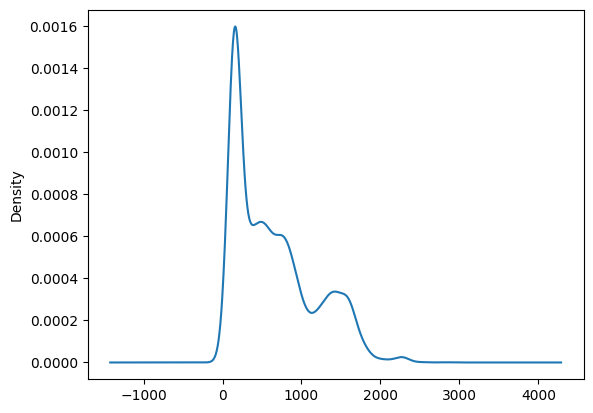

In [56]:
data.Duration.plot(kind = 'density')

In [57]:
data['Total_Stops'].isnull().sum()

1

In [58]:
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [59]:
data['Total_Stops'] = data['Total_Stops'].replace({'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4, 'nan' : 0})

In [60]:
data['Total_Stops'].value_counts()

Total_Stops
1.0    5625
0.0    3491
2.0    1520
3.0      45
4.0       1
Name: count, dtype: int64

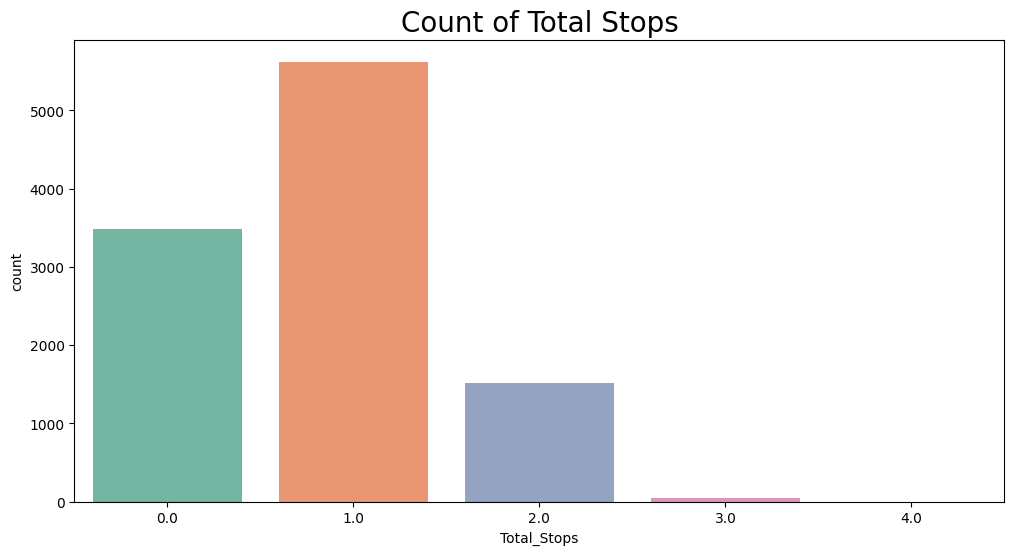

In [61]:
plt.figure(figsize = (12,6))
sns.countplot(x = "Total_Stops", data = data, palette = "Set2")
plt.title("Count of Total Stops", size = 20)
# plt.xticks(rotation = 90)
plt.show()

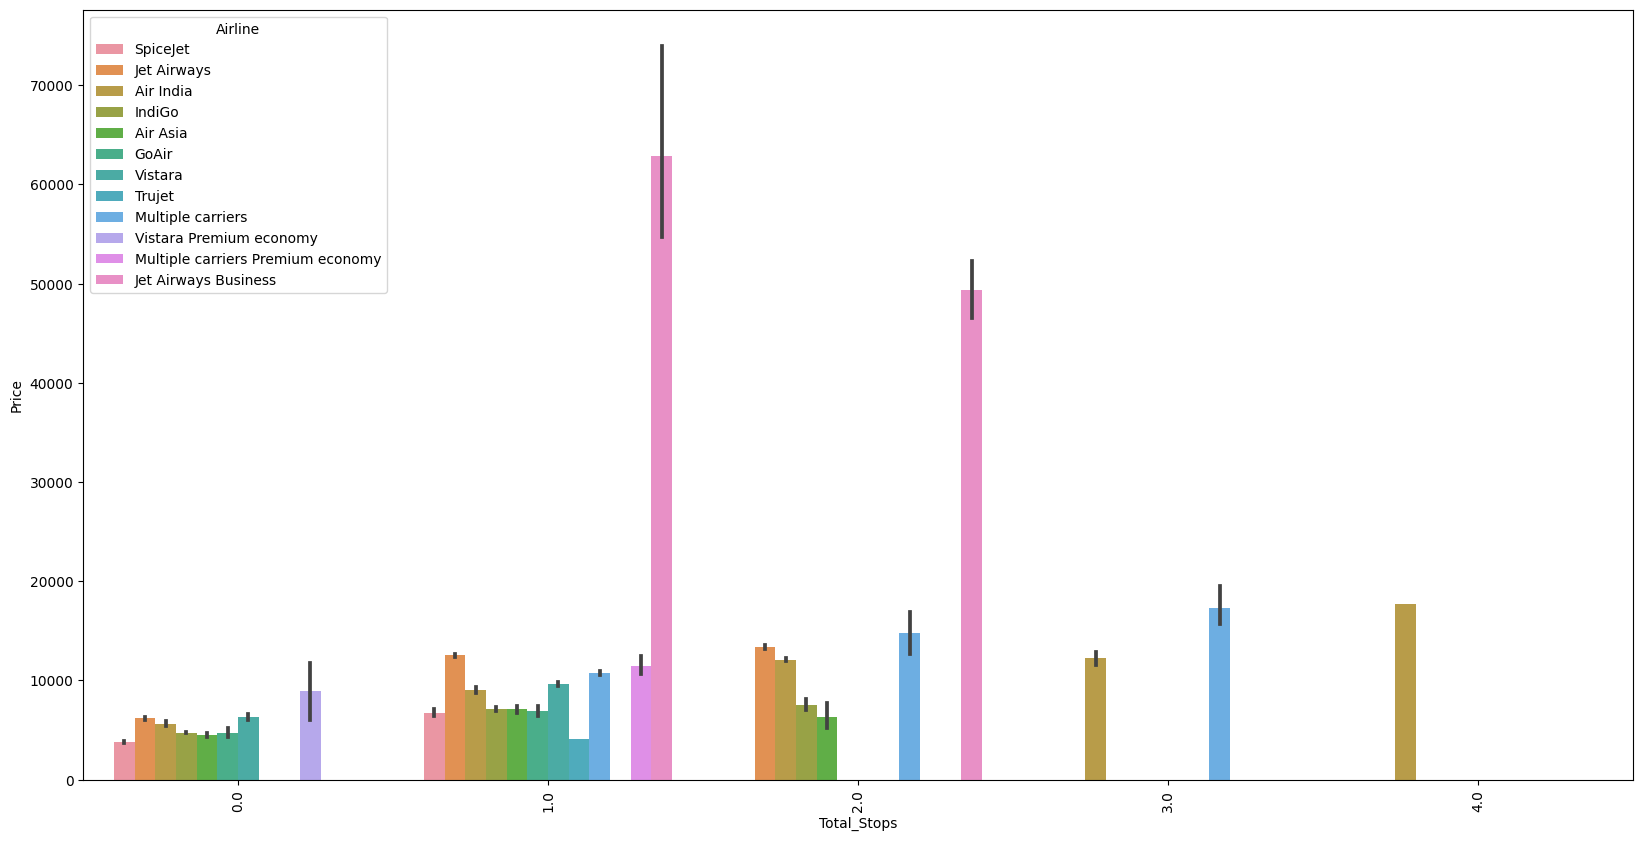

In [62]:
plt.figure(figsize = (20,10))
sns.barplot(x = "Total_Stops", y = "Price", hue = "Airline", data = data.sort_values("Price"))
plt.xticks(rotation = 90)
plt.show()

In [63]:
data['Additional_Info'].dtypes

dtype('O')

In [64]:
data['Additional_Info'].isnull().sum()

0

In [65]:
data['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [66]:
data['Additional_Info'].value_counts()

Additional_Info
No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: count, dtype: int64

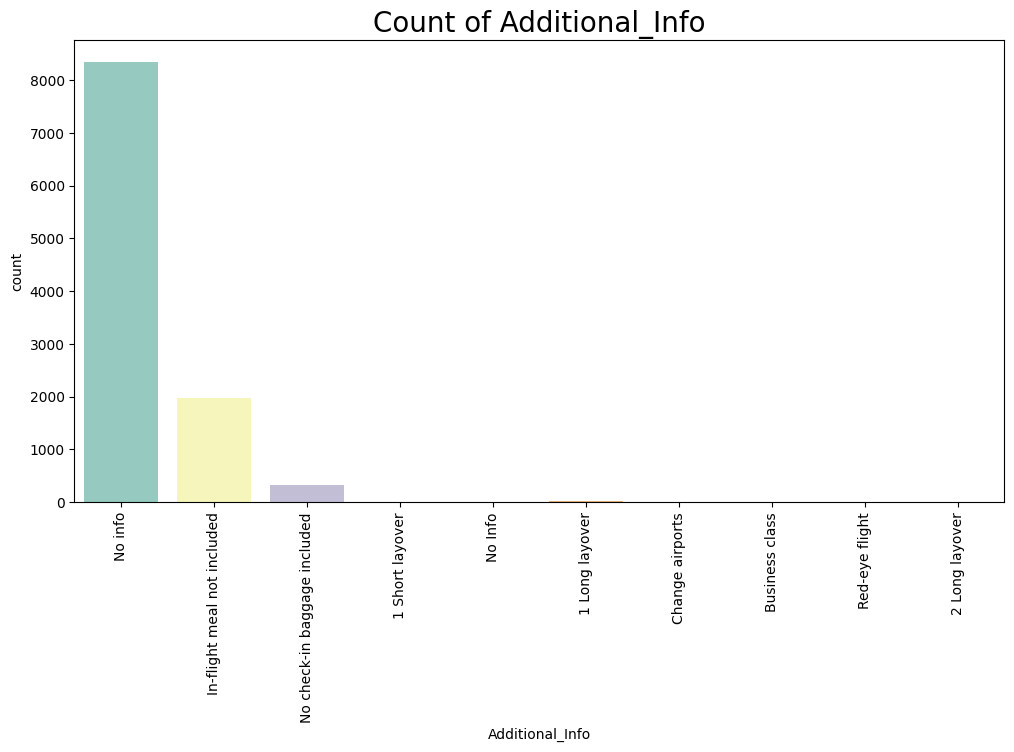

In [67]:
plt.figure(figsize = (12,6))
sns.countplot(x = "Additional_Info", data = data, palette = "Set3")
plt.title("Count of Additional_Info", size = 20)
plt.xticks(rotation = 90)
plt.show()

In [68]:
data["Price"].isnull().sum()

0

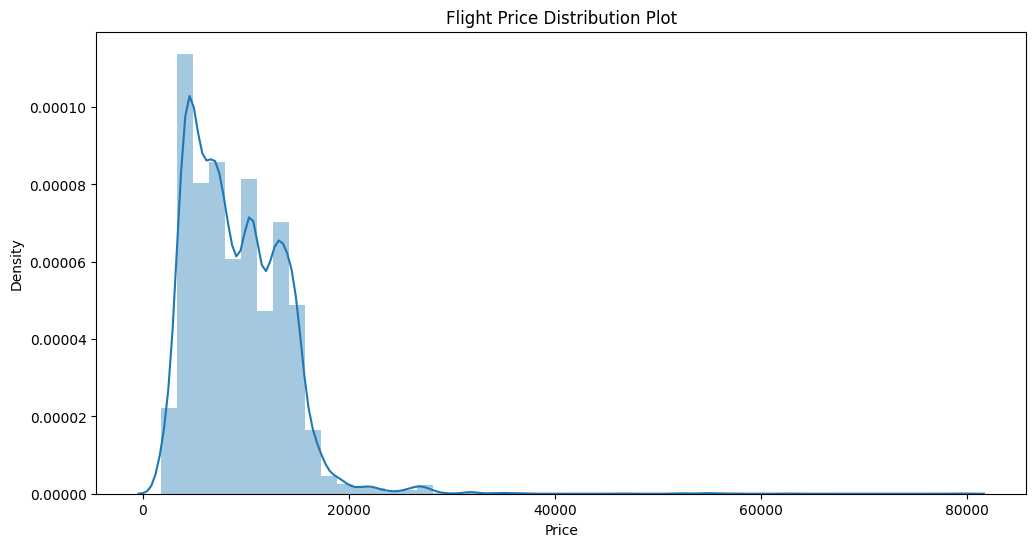

In [69]:
plt.figure(figsize = (12,6))
sns.distplot(data["Price"], kde = True)
plt.title("Flight Price Distribution Plot")
plt.show()

In [70]:
data["Price"].max()

79512

In [71]:
data["Price"].min()

1759

In [72]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute
0,IndiGo,24/03/2019,Banglore,Delhi,BLRDEL,22:20,01:10 22 Mar,170,0.0,No info,3897,24,3,2019,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCUIXRBBIBLR,05:50,13:15,445,2.0,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DELLKOBOMCOK,09:25,04:25 10 Jun,1140,2.0,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCUNAGBLR,18:05,23:30,325,1.0,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,01/03/2019,Banglore,Delhi,BLRNAGDEL,16:50,21:35,285,1.0,No info,13302,1,3,2019,16,50,21,35


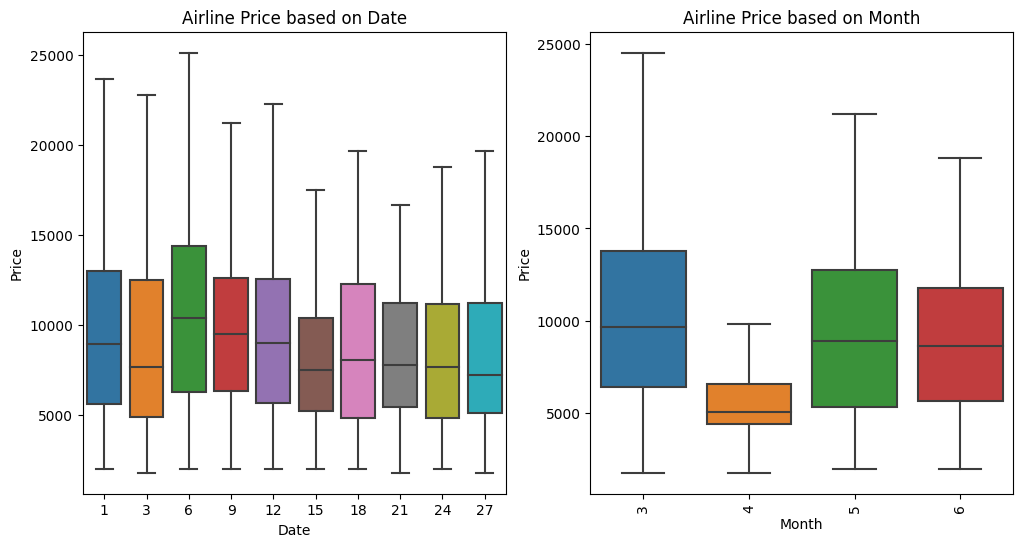

In [73]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.boxplot(data = data, y = "Price", x = "Date", showfliers = False).set_title("Airline Price based on Date")
plt.subplot(1,2,2)
sns.boxplot(data = data, y = "Price", x = "Month", showfliers = False).set_title("Airline Price based on Month")



plt.xticks(rotation = 90)
plt.show()

In [74]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute
0,IndiGo,24/03/2019,Banglore,Delhi,BLRDEL,22:20,01:10 22 Mar,170,0.0,No info,3897,24,3,2019,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCUIXRBBIBLR,05:50,13:15,445,2.0,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DELLKOBOMCOK,09:25,04:25 10 Jun,1140,2.0,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCUNAGBLR,18:05,23:30,325,1.0,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,01/03/2019,Banglore,Delhi,BLRNAGDEL,16:50,21:35,285,1.0,No info,13302,1,3,2019,16,50,21,35


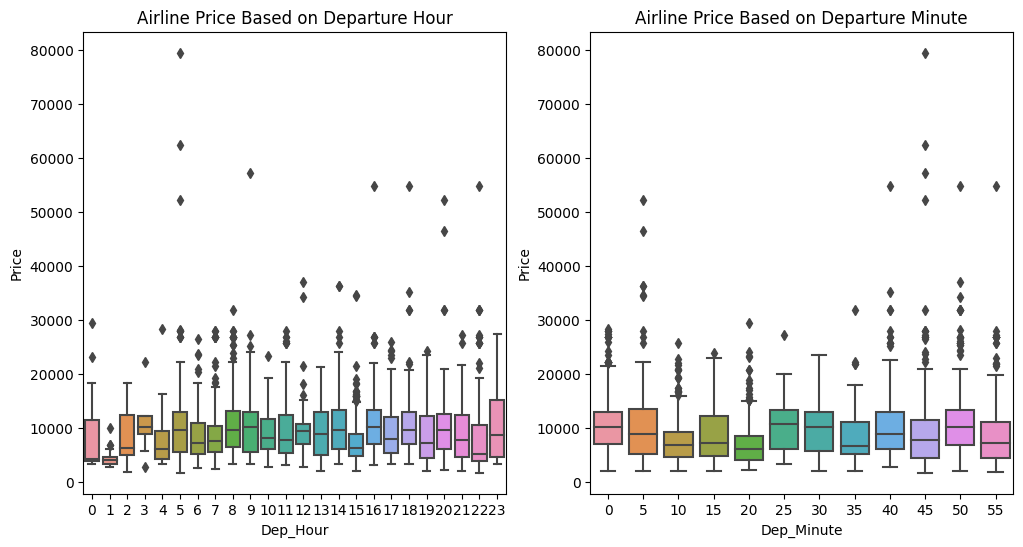

In [75]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.boxplot(data = data, x = "Dep_Hour", y = "Price").set_title("Airline Price Based on Departure Hour")
plt.subplot(1,2,2)
sns.boxplot(data = data, x = "Dep_Minute", y = "Price").set_title("Airline Price Based on Departure Minute")
plt.show()

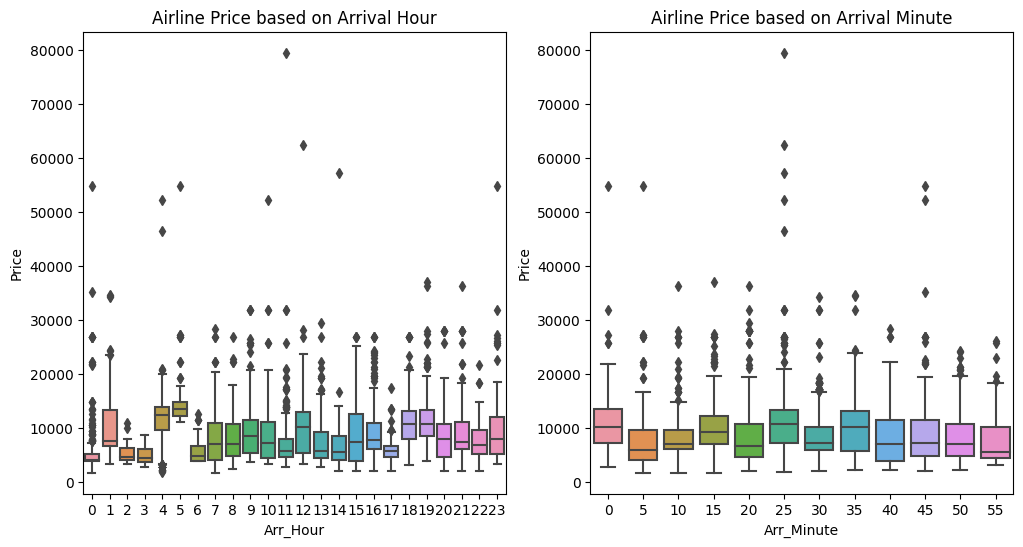

In [76]:
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.boxplot(data = data, x= "Arr_Hour", y = "Price").set_title("Airline Price based on Arrival Hour")
plt.subplot(1,2,2)
sns.boxplot(data = data, x= "Arr_Minute", y = "Price").set_title("Airline Price based on Arrival Minute")
plt.show()

In [77]:
data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute
0,IndiGo,24/03/2019,Banglore,Delhi,BLRDEL,22:20,01:10 22 Mar,170,0.0,No info,3897,24,3,2019,22,20,1,10
1,Air India,1/05/2019,Kolkata,Banglore,CCUIXRBBIBLR,05:50,13:15,445,2.0,No info,7662,1,5,2019,5,50,13,15
2,Jet Airways,9/06/2019,Delhi,Cochin,DELLKOBOMCOK,09:25,04:25 10 Jun,1140,2.0,No info,13882,9,6,2019,9,25,4,25
3,IndiGo,12/05/2019,Kolkata,Banglore,CCUNAGBLR,18:05,23:30,325,1.0,No info,6218,12,5,2019,18,5,23,30
4,IndiGo,01/03/2019,Banglore,Delhi,BLRNAGDEL,16:50,21:35,285,1.0,No info,13302,1,3,2019,16,50,21,35


In [78]:
data.drop(["Year", "Dep_Time", "Arrival_Time", "Date_of_Journey" ], axis = 1, inplace = True)

In [79]:
data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute
0,IndiGo,Banglore,Delhi,BLRDEL,170,0.0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCUIXRBBIBLR,445,2.0,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DELLKOBOMCOK,1140,2.0,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCUNAGBLR,325,1.0,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLRNAGDEL,285,1.0,No info,13302,1,3,16,50,21,35


In [80]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
Month              0
Dep_Hour           0
Dep_Minute         0
Arr_Hour           0
Arr_Minute         0
dtype: int64

In [81]:
data.iloc[np.where(data["Total_Stops"].isnull() == True)]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute
9039,Air India,Delhi,Cochin,DELBOMCOK,1420,NaN,No info,7480,6,5,9,45,9,25


In [82]:
data.loc[data["Total_Stops"].isnull(),'Total_Stops']=1

In [83]:
data.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
Date               0
Month              0
Dep_Hour           0
Dep_Minute         0
Arr_Hour           0
Arr_Minute         0
dtype: int64

In [84]:
data.describe()

,Duration,Total_Stops,Price,Date,Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute
count,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,643.093232,0.824207,9087.064121,13.508378,4.708602,12.490686,24.411214,13.348778,24.690630
std,507.862001,0.675199,4611.359167,8.479277,1.164357,5.748650,18.767980,6.859125,16.506036
min,5.000000,0.000000,1759.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,0.000000,5277.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,520.000000,1.000000,8372.000000,12.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,930.000000,1.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,2860.000000,4.000000,79512.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000


In [85]:
data.describe(include = 'object')

,Airline,Source,Destination,Route,Additional_Info
count,10683,10683,10683,10683,10683
unique,12,5,5,128,10
top,Jet Airways,Delhi,Cochin,DELBOMCOK,No info
freq,3849,4537,4537,2377,8345


In [86]:
data.dtypes

Airline             object
Source              object
Destination         object
Route               object
Duration             int64
Total_Stops        float64
Additional_Info     object
Price                int64
Date                 int32
Month                int32
Dep_Hour             int32
Dep_Minute           int32
Arr_Hour             int32
Arr_Minute           int32
dtype: object

In [87]:
data["Total_Stops"]  = data["Total_Stops"].astype(int)


In [88]:
cont_data = data.select_dtypes('int').columns
cat_data = data.select_dtypes('object').columns

In [89]:
cont_data = list(cont_data)
cont_data

['Duration',
 'Total_Stops',
 'Price',
 'Date',
 'Month',
 'Dep_Hour',
 'Dep_Minute',
 'Arr_Hour',
 'Arr_Minute']

In [90]:
cat_data = list(cat_data)
cat_data

['Airline', 'Source', 'Destination', 'Route', 'Additional_Info']

In [91]:
data[cont_data]

,Duration,Total_Stops,Price,Date,Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute
0,170,0,3897,24,3,22,20,1,10
1,445,2,7662,1,5,5,50,13,15
2,1140,2,13882,9,6,9,25,4,25
3,325,1,6218,12,5,18,5,23,30
4,285,1,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...
10678,150,0,4107,9,4,19,55,22,25
10679,155,0,4145,27,4,20,45,23,20
10680,180,0,7229,27,4,8,20,11,20
10681,160,0,12648,1,3,11,30,14,10



# Continous Data

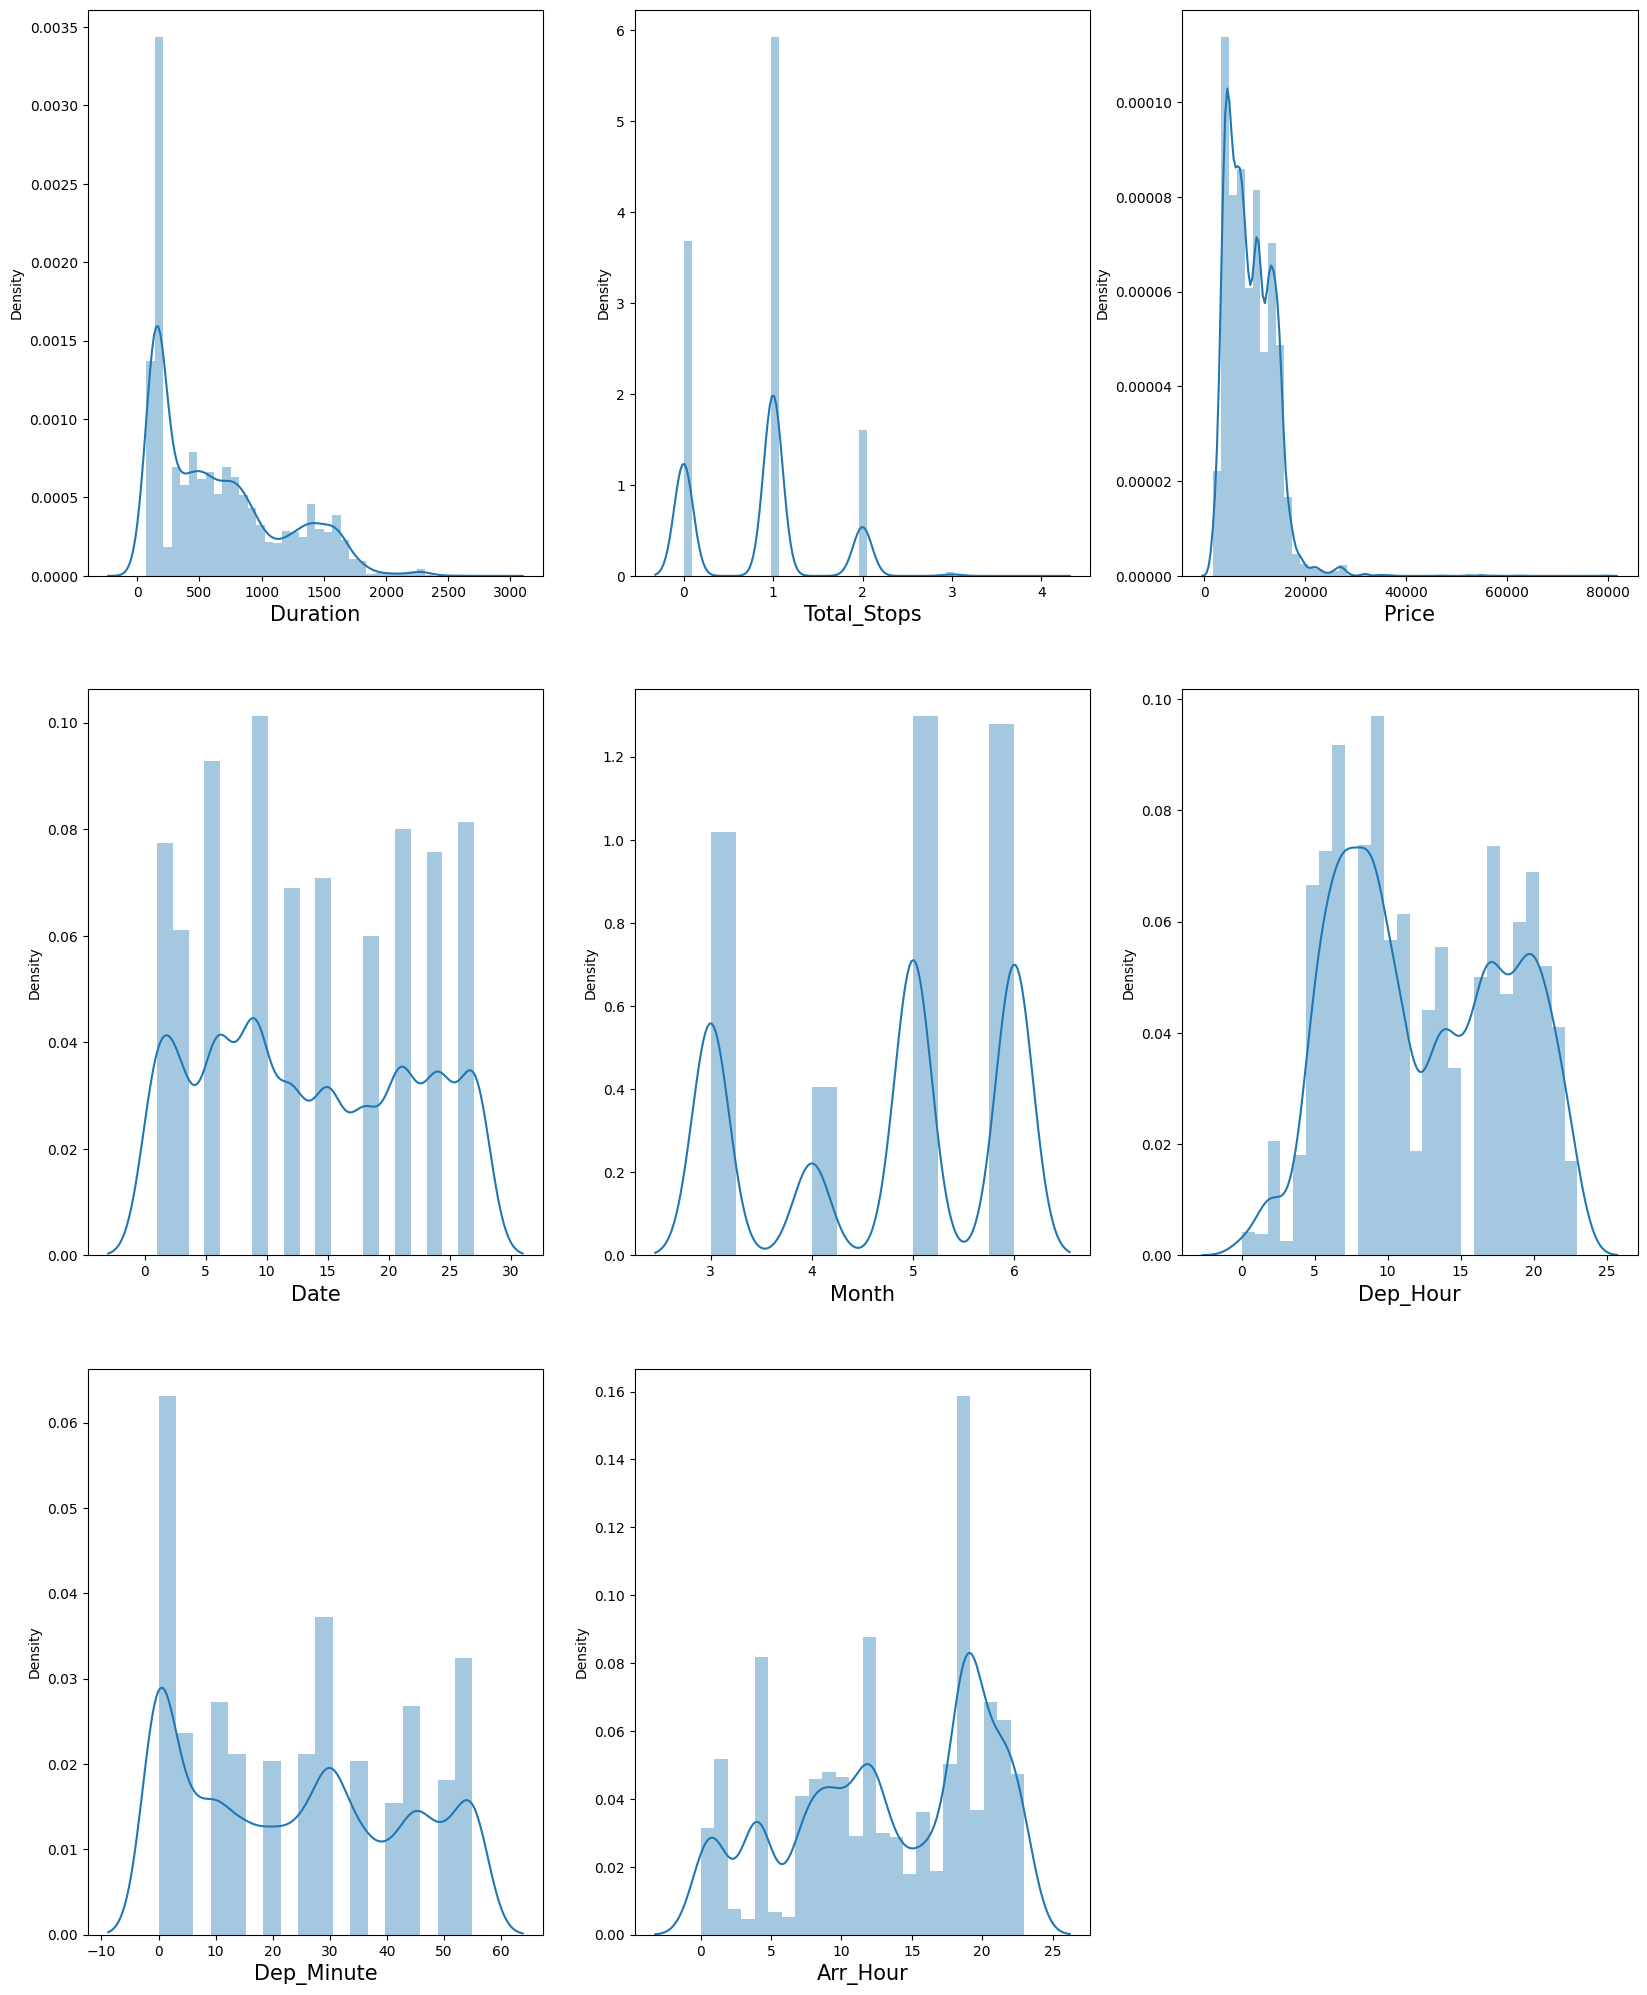

In [92]:
plt.figure(figsize = (20,25))
plt_num = 1
for col in cont_data:
    if plt_num<len(cont_data):
        ax = plt.subplot(3,3,plt_num)
        sns.distplot(x = data[col])
        plt.xlabel(col, size = 15)
    plt_num+=1
plt.show()    
        

# Categorical Data

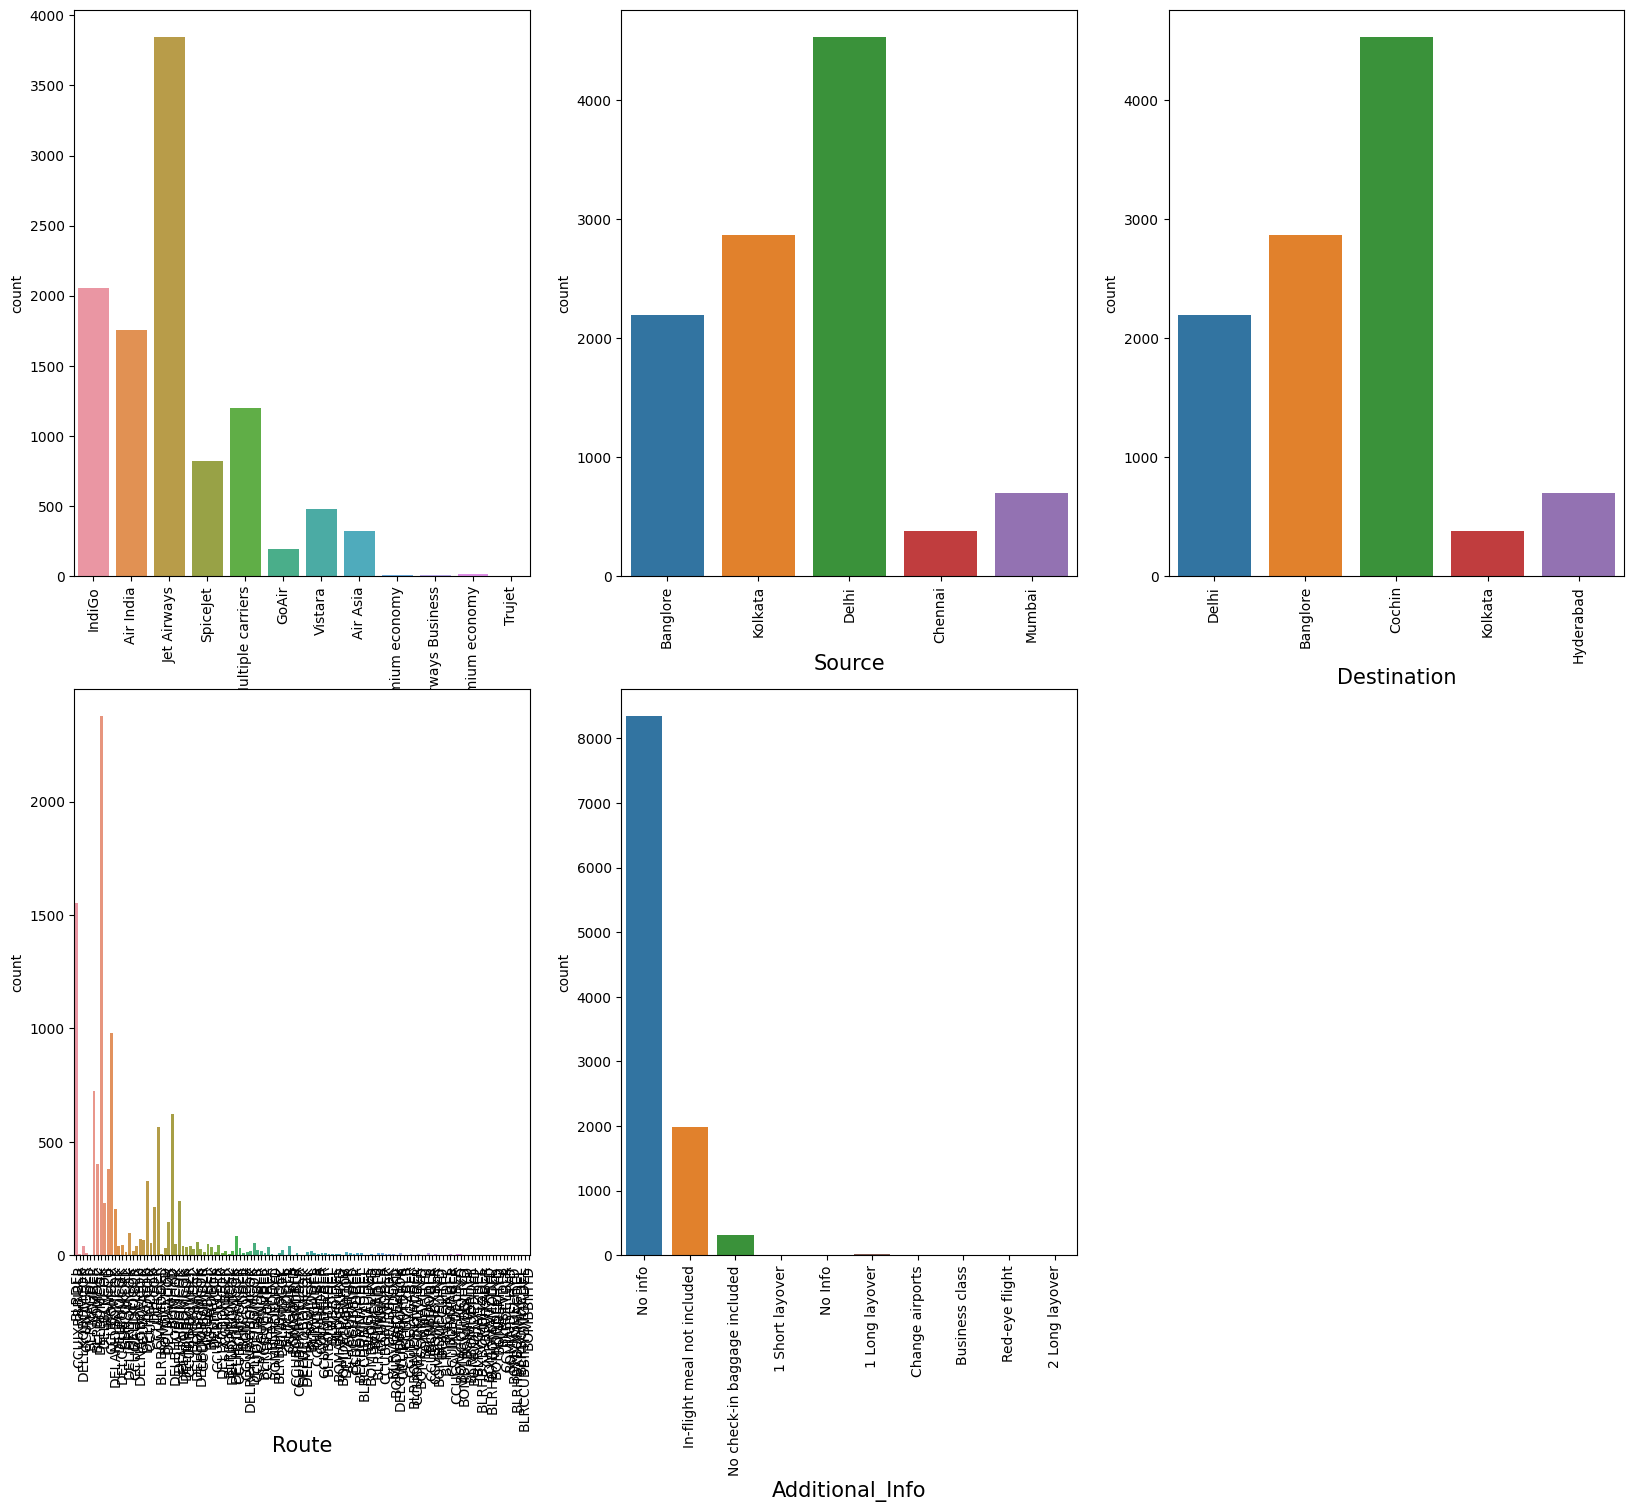

In [93]:
plt.figure(figsize = (20,25))
plt_num = 1
for col in cat_data:
    if plt_num<len(cont_data):
        ax = plt.subplot(3,3,plt_num)
        sns.countplot(x = data[col])
        plt.xlabel(col, size = 15)
        plt.xticks(rotation = 90)
    plt_num+=1
plt.show()    

# Checking Outliers

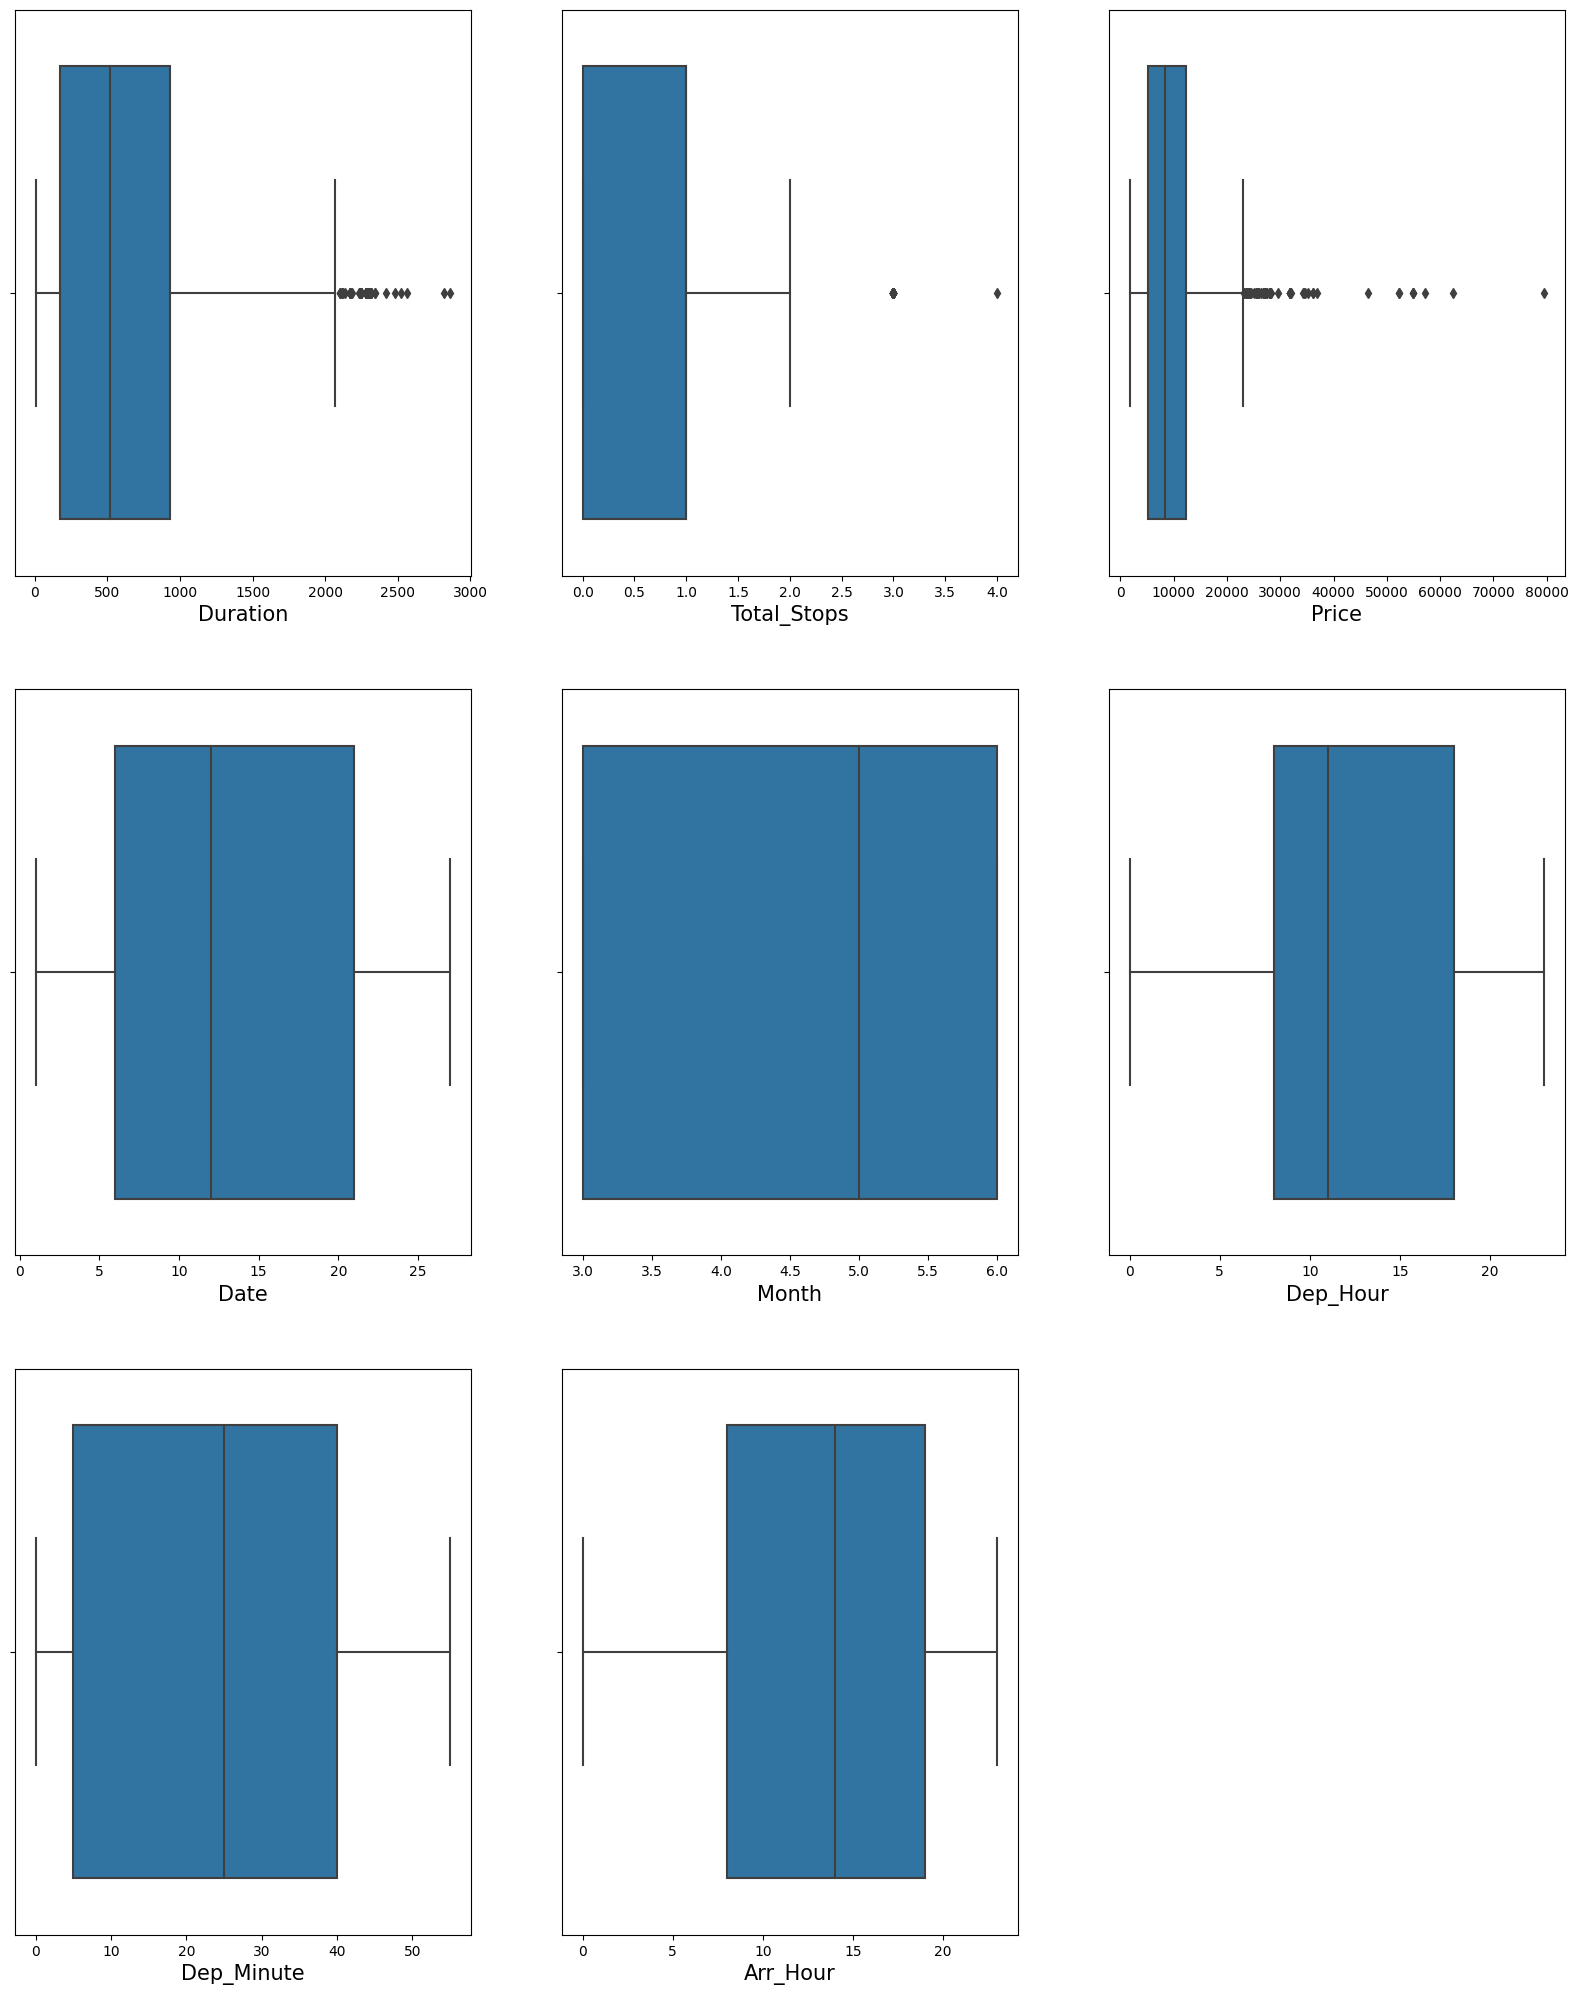

In [94]:
plt.figure(figsize = (20,25))
plt_num = 1
for col in cont_data:
    if plt_num<len(cont_data):
        ax = plt.subplot(3,3,plt_num)
        sns.boxplot(x = data[col], data = data)
        plt.xlabel(col, size = 15)
    plt_num+=1
plt.show()    
        

<Axes: xlabel='Price'>

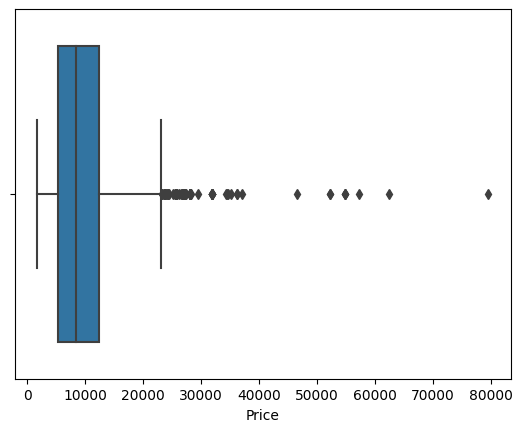

In [95]:
sns.boxplot(x = 'Price', data = data)

# Checking Duplicate Rows in DataSet

In [96]:
data[data.duplicated()]

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute
683,Jet Airways,Delhi,Cochin,DELNAGBOMCOK,830,2,No info,13376,1,6,14,35,4,25
1061,Air India,Delhi,Cochin,DELGOIBOMCOK,1275,2,No info,10231,21,5,22,0,19,15
1348,Air India,Delhi,Cochin,DELHYDBOMCOK,1560,2,No info,12392,18,5,17,15,19,15
1418,Jet Airways,Delhi,Cochin,DELJAIBOMCOK,1375,2,In-flight meal not included,10368,6,6,5,30,4,25
1674,IndiGo,Banglore,Delhi,BLRDEL,175,0,No info,7303,24,3,18,25,21,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10594,Jet Airways,Delhi,Cochin,DELAMDBOMCOK,810,2,No info,12819,27,6,23,5,12,35
10616,Jet Airways,Delhi,Cochin,DELJAIBOMCOK,1615,2,No info,13014,1,6,9,40,12,35
10634,Jet Airways,Delhi,Cochin,DELJAIBOMCOK,1615,2,In-flight meal not included,11733,6,6,9,40,12,35
10672,Jet Airways,Delhi,Cochin,DELAMDBOMCOK,1195,2,In-flight meal not included,11150,27,6,23,5,19,0


In [97]:
data_new = data.drop_duplicates()

In [98]:
data_new

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute
0,IndiGo,Banglore,Delhi,BLRDEL,170,0,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCUIXRBBIBLR,445,2,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DELLKOBOMCOK,1140,2,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCUNAGBLR,325,1,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,Delhi,BLRNAGDEL,285,1,No info,13302,1,3,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCUBLR,150,0,No info,4107,9,4,19,55,22,25
10679,Air India,Kolkata,Banglore,CCUBLR,155,0,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLRDEL,180,0,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,Delhi,BLRDEL,160,0,No info,12648,1,3,11,30,14,10


In [99]:
data_new.shape

(10461, 14)

# Feature Selection

In [100]:
temp_data = data_new.copy()
for col in temp_data:
    if temp_data[col].dtypes=='object':
        encoder = LabelEncoder()
        temp_data[col]=encoder.fit_transform(temp_data[col])
        

In [101]:
abs(temp_data.corrwith(temp_data['Price'])).sort_values(ascending = False)

Price              1.000000
Total_Stops        0.601963
Duration           0.501597
Destination        0.260673
Date               0.158960
Route              0.154196
Month              0.113613
Arr_Minute         0.086295
Additional_Info    0.068737
Airline            0.036549
Arr_Hour           0.030841
Dep_Minute         0.024210
Source             0.013596
Dep_Hour           0.005392
dtype: float64

In [102]:
temp_data.to_csv("Clean_data.csv")
clean_data = pd.read_csv("Clean_data.csv")


<Axes: >

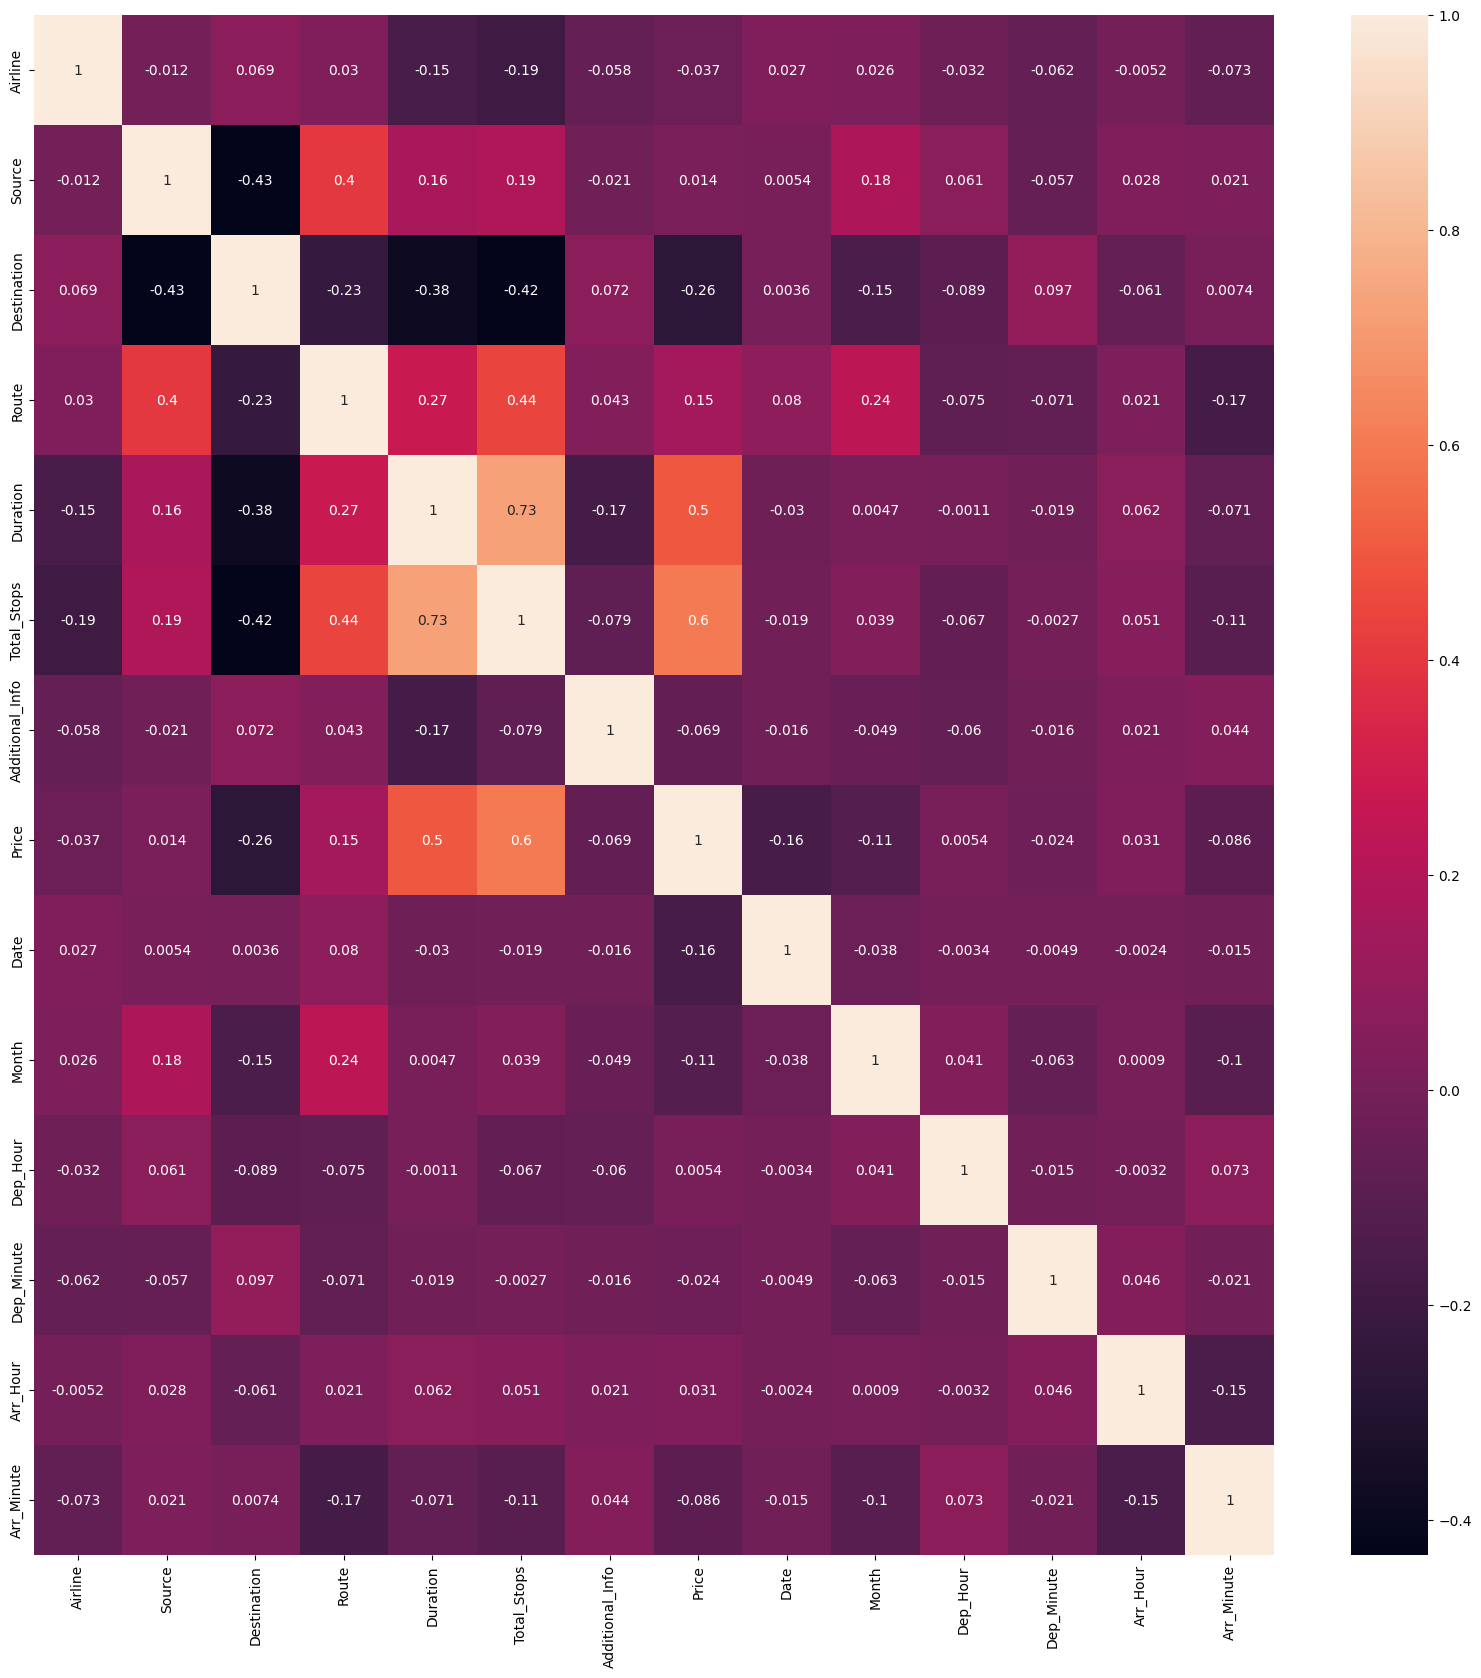

In [103]:
plt.figure(figsize = (20,20))
sns.heatmap(temp_data.corr(), annot = True)

# Linearity of Original Data

In [104]:
train_data = clean_data.copy()
train_data.drop('Price', axis = 1, inplace = True)

In [105]:
train_data.head()

,Unnamed: 0,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Date,Month,Dep_Hour,Dep_Minute,Arr_Hour,Arr_Minute
0,0,3,0,2,18,170,0,8,24,3,22,20,1,10
1,1,1,3,0,84,445,2,8,1,5,5,50,13,15
2,2,4,2,1,118,1140,2,8,9,6,9,25,4,25
3,3,3,3,0,91,325,1,8,12,5,18,5,23,30
4,4,3,0,2,29,285,1,8,1,3,16,50,21,35


In [106]:
log_price = np.log(data['Price'])
train_data['log_price'] = log_price

In [107]:
train_data.drop(['Unnamed: 0'],axis =1, inplace = True)
train_data.drop(["Arr_Minute"], axis = 1, inplace = True)
train_data.drop(["Additional_Info"], axis = 1, inplace = True)
train_data.drop(["Airline"], axis = 1, inplace = True)
train_data.drop(["Dep_Minute"], axis = 1, inplace = True)
train_data.drop(["Arr_Hour"], axis = 1, inplace = True)
train_data.drop(["Source"], axis = 1, inplace = True)
train_data.drop(["Dep_Hour"], axis = 1, inplace = True)
train_data.head()

,Destination,Route,Duration,Total_Stops,Date,Month,log_price
0,2,18,170,0,24,3,8.267962
1,0,84,445,2,1,5,8.944028
2,1,118,1140,2,9,6,9.538348
3,0,91,325,1,12,5,8.735204
4,2,29,285,1,1,3,9.495670


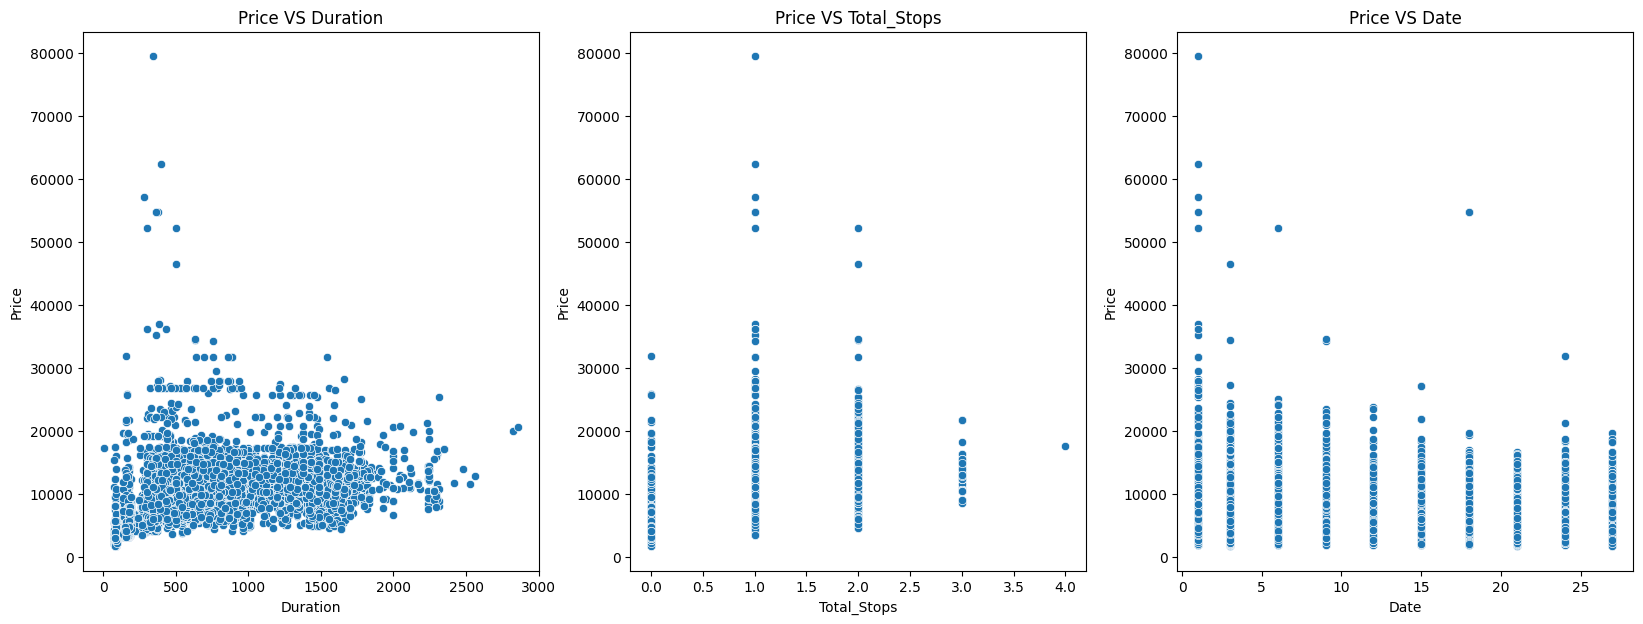

In [108]:
plt.figure(figsize =(20,7))
plt.subplot(1,3,1)
sns.scatterplot(x = 'Duration', y = 'Price', data = data)
plt.title("Price VS Duration")
plt.subplot(1,3,2)
sns.scatterplot(x = 'Total_Stops', y= 'Price', data = data)
plt.title("Price VS Total_Stops")
plt.subplot(1,3,3)
sns.scatterplot(x = 'Date', y='Price', data = data)
plt.title("Price VS Date")
plt.show()

<Axes: xlabel='Route', ylabel='Price'>

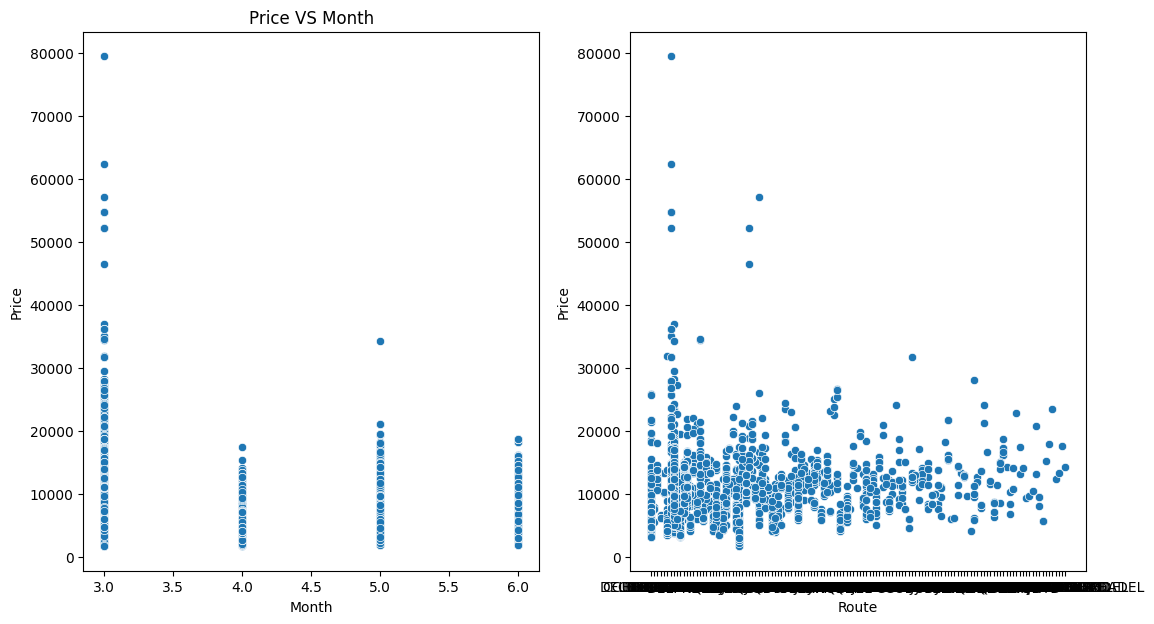

In [109]:
plt.figure(figsize = (20,7))
plt.subplot(1,3,1)
sns.scatterplot(x = 'Month', y = 'Price', data = data)
plt.title("Price VS Month")
plt.subplot(1,3,2)
sns.scatterplot(x = 'Route', y = 'Price', data = data)

<Axes: xlabel='Price', ylabel='Density'>

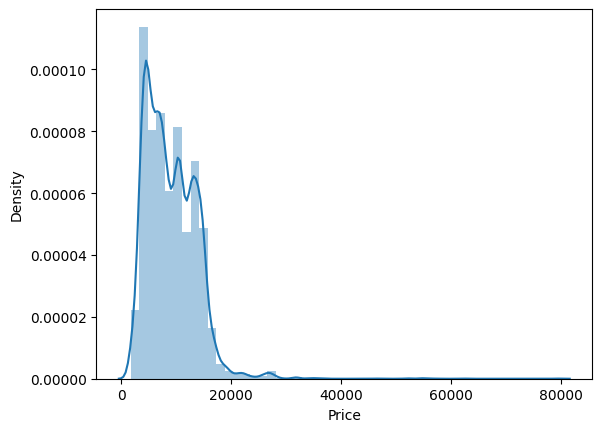

In [110]:
sns.distplot(data['Price'])

# Colinearity of TrainingData

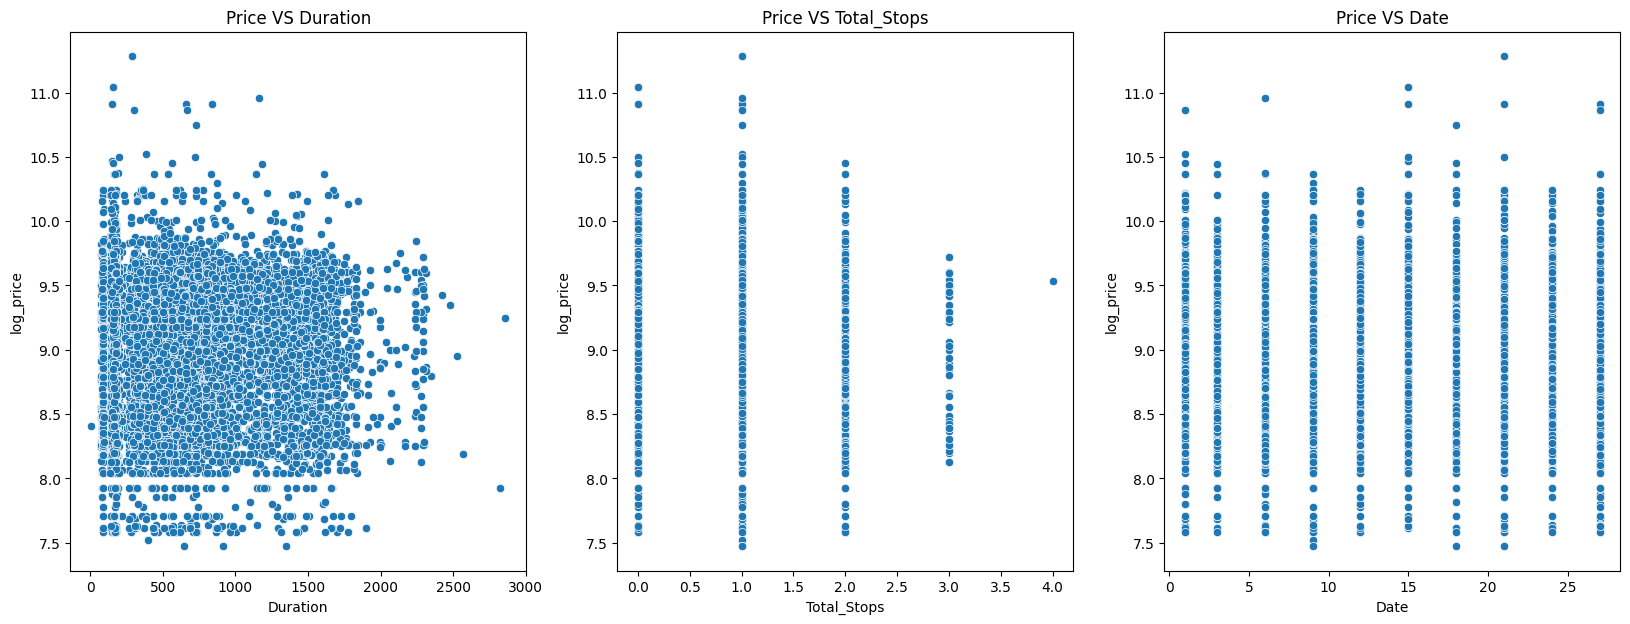

In [111]:
plt.figure(figsize =(20,7))
plt.subplot(1,3,1)
sns.scatterplot(x = 'Duration', y = 'log_price', data = train_data)
plt.title("Price VS Duration")
plt.subplot(1,3,2)
sns.scatterplot(x = 'Total_Stops', y= 'log_price', data = train_data)
plt.title("Price VS Total_Stops")
plt.subplot(1,3,3)
sns.scatterplot(x = 'Date', y='log_price', data = train_data)
plt.title("Price VS Date")
plt.show()

<Axes: xlabel='Route', ylabel='log_price'>

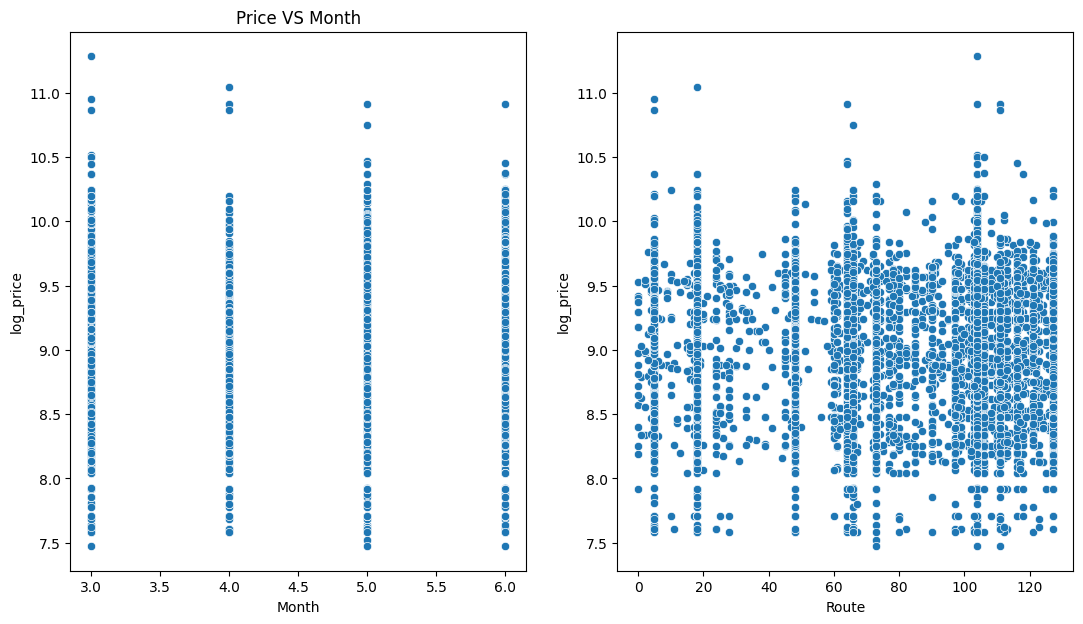

In [112]:
plt.figure(figsize = (20,7))
plt.subplot(1,3,1)
sns.scatterplot(x = 'Month', y = 'log_price', data = train_data)
plt.title("Price VS Month")
plt.subplot(1,3,2)
sns.scatterplot(x = 'Route', y = 'log_price', data = train_data)

<Axes: xlabel='log_price', ylabel='Density'>

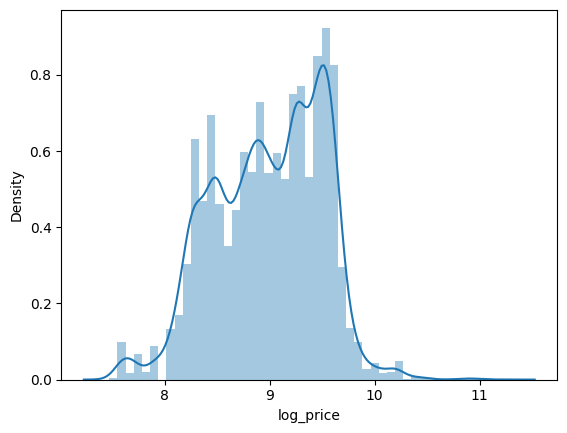

In [113]:
sns.distplot(train_data['log_price'])

# Train Test Split

In [118]:
X = train_data.drop('log_price', axis = 1)
y = train_data['log_price']

In [131]:
X

,Destination,Route,Duration,Total_Stops,Date,Month
0,2,18,170,0,24,3
1,0,84,445,2,1,5
2,1,118,1140,2,9,6
3,0,91,325,1,12,5
4,2,29,285,1,1,3
...,...,...,...,...,...,...
10456,0,64,150,0,9,4
10457,0,64,155,0,27,4
10458,2,18,180,0,27,4
10459,2,18,160,0,1,3


In [130]:
y

0        8.267962
1        8.944028
2        9.538348
3        8.735204
4        9.495670
           ...   
10456    9.937599
10457    9.742379
10458    9.599812
10459    8.195610
10460    7.708411
Name: log_price, Length: 10461, dtype: float64

In [128]:
X.shape

(10461, 6)

In [129]:
y.shape

(10461,)

In [119]:
# ExtraTreesRegressor for controlling overfitting and improve accuracy

In [121]:
model_etr = ExtraTreesRegressor()
model_etr.fit(X, y)

ExtraTreesRegressor()

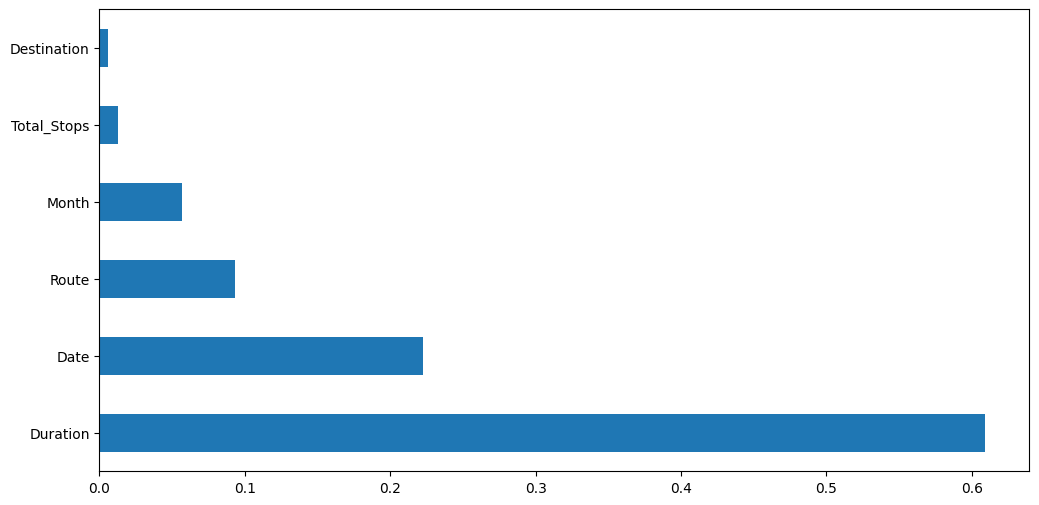

In [123]:
plt.figure(figsize = (12,6))
feat_importances = pd.Series(model_etr.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [125]:
print(feat_importances)

Destination    0.005694
Route          0.093294
Duration       0.609230
Total_Stops    0.012548
Date           0.222243
Month          0.056990
dtype: float64


In [132]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size = 0.225, random_state = 1)

In [138]:
def mertics(model):
    print(f'Train Score{model.score(x_train, y_train)}')
    print(f'Test Score{model.score(x_test, y_test)}')
    print("MEAN ABSOLUTE ERROR", mean_absolute_error(y_test, model.predict(x_test)))
    print("MEAN SQUARED ERROR", mean_squared_error(y_test, model.predict(x_test)))
    print("MEAN ABSOLUTE ERROR",np.sqrt(mean_absolute_error(y_test, model.predict(x_test))))

# Linear Regression

In [140]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print("r2_Score", r2_score(y_test,y_pred_lr))
print("Root Mean Square Error",np.sqrt(mean_squared_error(y_test, y_pred_lr)))

r2_Score -0.0012338484701650554
Root Mean Square Error 0.5173449701784797


# Gradiant Boosting Regressor

In [142]:
gbt = GradientBoostingRegressor()
gbt.fit(x_train,y_train)
y_pred_gbt = gbt.predict(x_test)
print("r2_Score",r2_score(y_test,y_pred_gbt))
print("Root Mean Squared Error",np.sqrt(mean_squared_error(y_test,y_pred_gbt)))

r2_Score -0.008822972307359178
Root Mean Squared Error 0.5193019471621313


# Random Forest Regressor

In [145]:
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)
y_pred_rfr = rfr.predict(x_test)
print("R2_Score", r2_score(y_test, y_pred_rfr))
print("Root Mean Squared Error", np.sqrt(mean_squared_error(y_test, y_pred_rfr)))

R2_Score -0.18449622834279533
Root Mean Squared Error 0.5627031036083746


# XGBoost Regressor

In [147]:
xg= XGBRegressor()
xg.fit(x_train, y_train)
Y_pred_xg= xg.predict(x_test)
r_squared = r2_score(y_test,Y_pred_xg)
rmse = np.sqrt(mean_squared_error(y_test,Y_pred_xg))
print("R_squared :",r_squared)
print("MAE :",mean_absolute_error(y_test,Y_pred_xg))
print('MSE:', mean_squared_error(y_test, Y_pred_xg))
print("RMSE :",rmse)

R_squared : -0.10034862300514358
MAE : 0.446398893045896
MSE: 0.29414078232103347
RMSE : 0.5423474737850573
